<a href="https://colab.research.google.com/github/ReillyOareVT/HydroLearners_Proj/blob/main/eda/Static_EDA_and_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Static Data EDA & Transformations**
**Author:** Emma Reilly Oare
<br>**Date:** April 17, 2025
<br>**Purpose:** Exploratory data analysis (EDA) and Transformations of all static attributes for later feature engineering. These datasets will be used for clustering and mean regression.

In [176]:
# Read in libs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
import scipy.stats as stats
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel

# Show all columns
pd.set_option('display.max_columns', None)

In [44]:
# Only clone if the repo doesn't already exist
if not os.path.exists('/content/HydroLearners_Proj'):
    !git clone https://github.com/ReillyOareVT/HydroLearners_Proj

# Change directory
BASE_DIR = '/content/HydroLearners_Proj'
os.chdir(BASE_DIR)

# Confirm location
!pwd

/content/HydroLearners_Proj


## Step 1: Read in Data

In [45]:
# Define path
static_path = os.path.join(BASE_DIR, 'eda', 'processed_data', 'joined_static_df.xlsx')

# Read in df
static_df = pd.read_excel(static_path).drop(columns = 'Unnamed: 0')

In [46]:
# Display df
static_df

Basin ID  % Evaporites  % Ice and Glaciers  % Metamorphics  % No Data  \
0      AT000001           0.0               0.553          23.464        0.0   
1      AT000002           0.0               0.000          88.549        0.0   
2      AT000003           0.0               0.112          84.653        0.0   
3      AT000004           0.0               0.000          59.940        0.0   
4      AT000005           0.0               0.000          15.582        0.0   
...         ...           ...                 ...             ...        ...   
13511  UAGR0017           0.0               0.000           0.000        0.0   
13512  UAGR0018           0.0               0.000           0.000        0.0   
13513  UAGR0019           0.0               0.000           0.000        0.0   
13514  UAGR0020           0.0               0.000          22.366        0.0   
13515  UAGR0021           0.0               0.000           0.000        0.0   

       % Acid Plutonic Rocks  % Basic Putonic Rocks  \
0                      2.657                  0.042   
1                      0.000                  0.000   
2                      0.000                  0.000   
3                      0.000                  0.000   
4                      0.000                  0.000   
...                      ...                    ...   
13511                  0.000                  0.000   
13512                  0.000                  0.000   
13513                  0.000                  0.000   
13514                 43.474                  0.000   
13515                  0.000                  0.000   

       % ntermedite Plutonic Rocks  % Pyroclastics  \
0                             0.19             0.0   
1                             0.00             0.0   
2                             0.00             0.0   
3                             0.00             0.0   
4                             0.00             0.0   
...                            ...             ...   
13511                         0.00             0.0   
13512                         0.00             0.0   
13513                         0.00             0.0   
13514                         0.00             0.0   
13515                         0.00             0.0   

       % Carbonate Sedimentary Rocks  % Mixed Sedimentary Rocks  \
0                             38.753                      5.521   
1                              4.181                      7.270   
2                             13.194                      1.969   
3                             40.060                      0.000   
4                             82.065                      0.885   
...                              ...                        ...   
13511                         42.724                      0.000   
13512                         79.460                      6.341   
13513                         85.825                      0.000   
13514                          0.000                     34.160   
13515                          0.000                    100.000   

       % Siliciclastic Sedimentary Rocks  % Unconsolidated Sediments  \
0                                  3.888                      22.064   
1                                  0.000                       0.000   
2                                  0.000                       0.070   
3                                  0.000                       0.000   
4                                  0.000                       0.000   
...                                  ...                         ...   
13511                             57.276                       0.000   
13512                             14.198                       0.000   
13513                             14.175                       0.000   
13514                              0.000                       0.000   
13515                              0.000                       0.000   

       % Acid Volcanic Rocks  % Basic Volcanic Rocks  \
0         

## Step 2. Exploratory Data Analysis

### Step 2a. Preliminary, Group-Based EDA
Based on the DataCleaning notebook, we have a good idea of which columns come from which datasets. We'll look at these groups individually first.

#### Geology

In [47]:
# Identify % geology columns
geology_cols = [
    '% Evaporites', '% Ice and Glaciers', '% Metamorphics', '% No Data',
    '% Acid Plutonic Rocks', '% Basic Putonic Rocks', '% ntermedite Plutonic Rocks',
    '% Pyroclastics', '% Carbonate Sedimentary Rocks', '% Mixed Sedimentary Rocks',
    '% Siliciclastic Sedimentary Rocks', '% Unconsolidated Sediments',
    '% Acid Volcanic Rocks', '% Basic Volcanic Rocks', '% Intermediate Volcanic Rocks',
    '% Water Bodies'
]

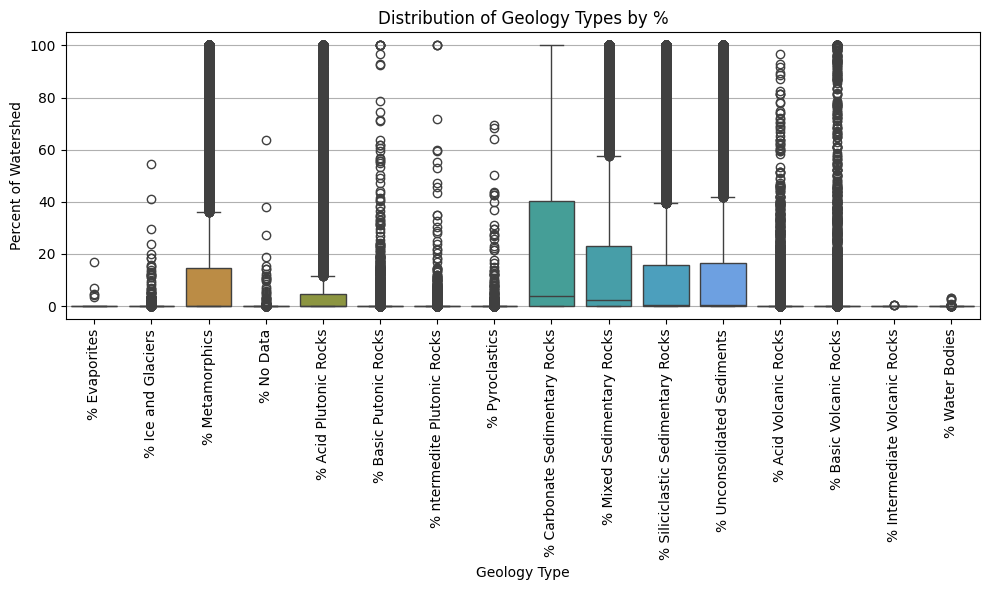

In [48]:
# Create boxplot of % geology types
melted = static_df[geology_cols].melt(var_name='Geology Type', value_name='Percent of Watershed')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Geology Type', y='Percent of Watershed', hue = 'Geology Type')
plt.xticks(rotation=90)
plt.title('Distribution of Geology Types by %')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

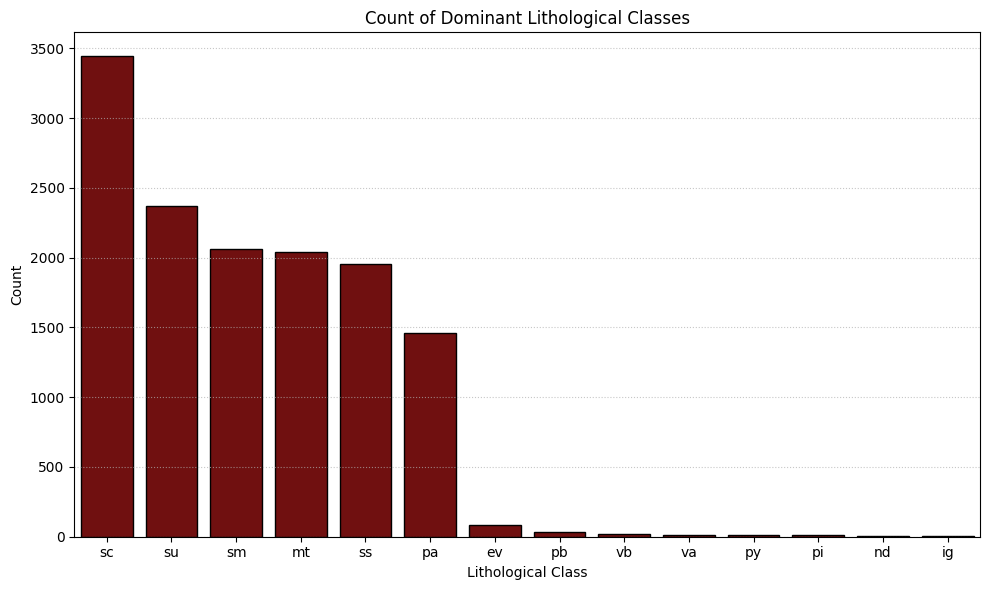

In [49]:
# Plot bar plot of dominant lithological class
plt.figure(figsize=(10, 6))
sns.countplot(data=static_df, x='Lithological Dominant Class',
              order=static_df['Lithological Dominant Class'].value_counts().index,
              color = 'maroon', edgecolor = 'k')
plt.title('Count of Dominant Lithological Classes')
plt.xlabel('Lithological Class')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

#### Hydrology Attributes

In [50]:
# Identify hydrology attribute columns
num_things_cols = [
    '# of Upstream Dams',	'# of Upstream Reservoirs',	'# of Upstream Lakes'
]
storage_cols =[
    'Total Area of Upstream Lakes',	'Total Upstream Lake Volume'
]

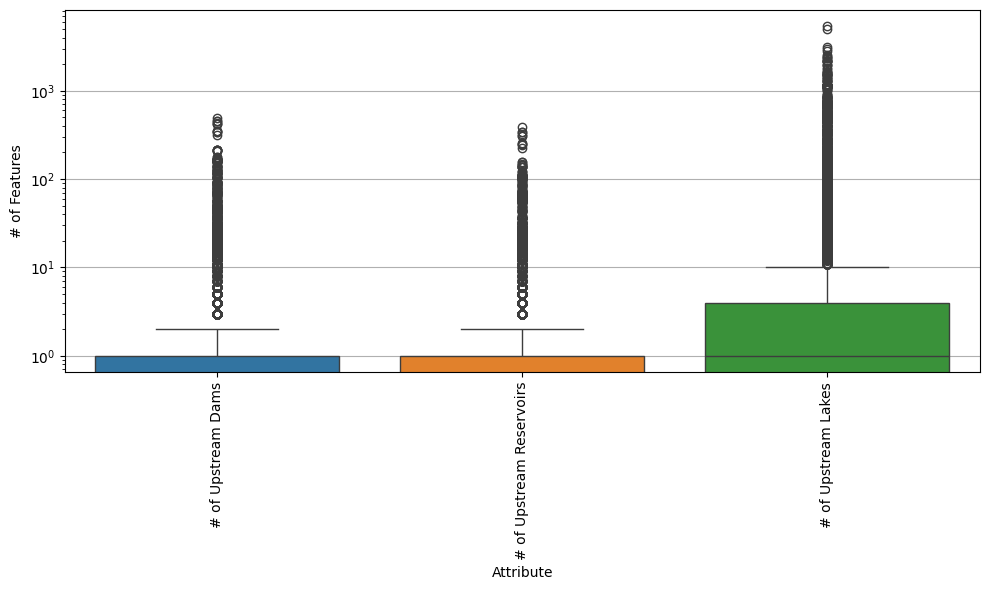

In [51]:
# Create boxplot of features
melted = static_df[num_things_cols].melt(var_name='Attribute', value_name='# of Features')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Attribute', y='# of Features', hue = 'Attribute')
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis='y')

plt.show()

In [52]:
# Display summary stats for lake info
static_df[storage_cols].describe()

Total Area of Upstream Lakes  Total Upstream Lake Volume
count                  13516.000000                1.351600e+04
mean                      54.301458                1.011519e+03
std                      583.551797                1.335122e+04
min                        0.000000                0.000000e+00
25%                        0.000000                0.000000e+00
50%                        0.000000                0.000000e+00
75%                        2.670000                2.202250e+01
max                    45825.360000                1.301789e+06

#### Hydrology & Meteorology

Next, we'll just look at the other meteological features in general.

In [180]:
# Identify numerical meteorological columns
meteo_cols = [
    'Ratio of Mean Daily Streamflow/Precipitation',
    'Streamflow Precipitation Elasticity',
    '5% Flow Quantile (mm/day)',
    '95% Flow Quantile (mm/day)',
    'Days/Year with No Flow',
    'Mean Daily Precipitation (mm/day)',
    'Mean Daily PET (mm/day)',
    'Ratio of PET/Precipitation',
    'Fraction of Snow on Days <0 C',
    'Days/Year of High Precipitation',
    'Avg Duration of High Precipitation',
    'Days/Year of Low Precipitation',
    'Avg Duration of Low Precipitation',
]

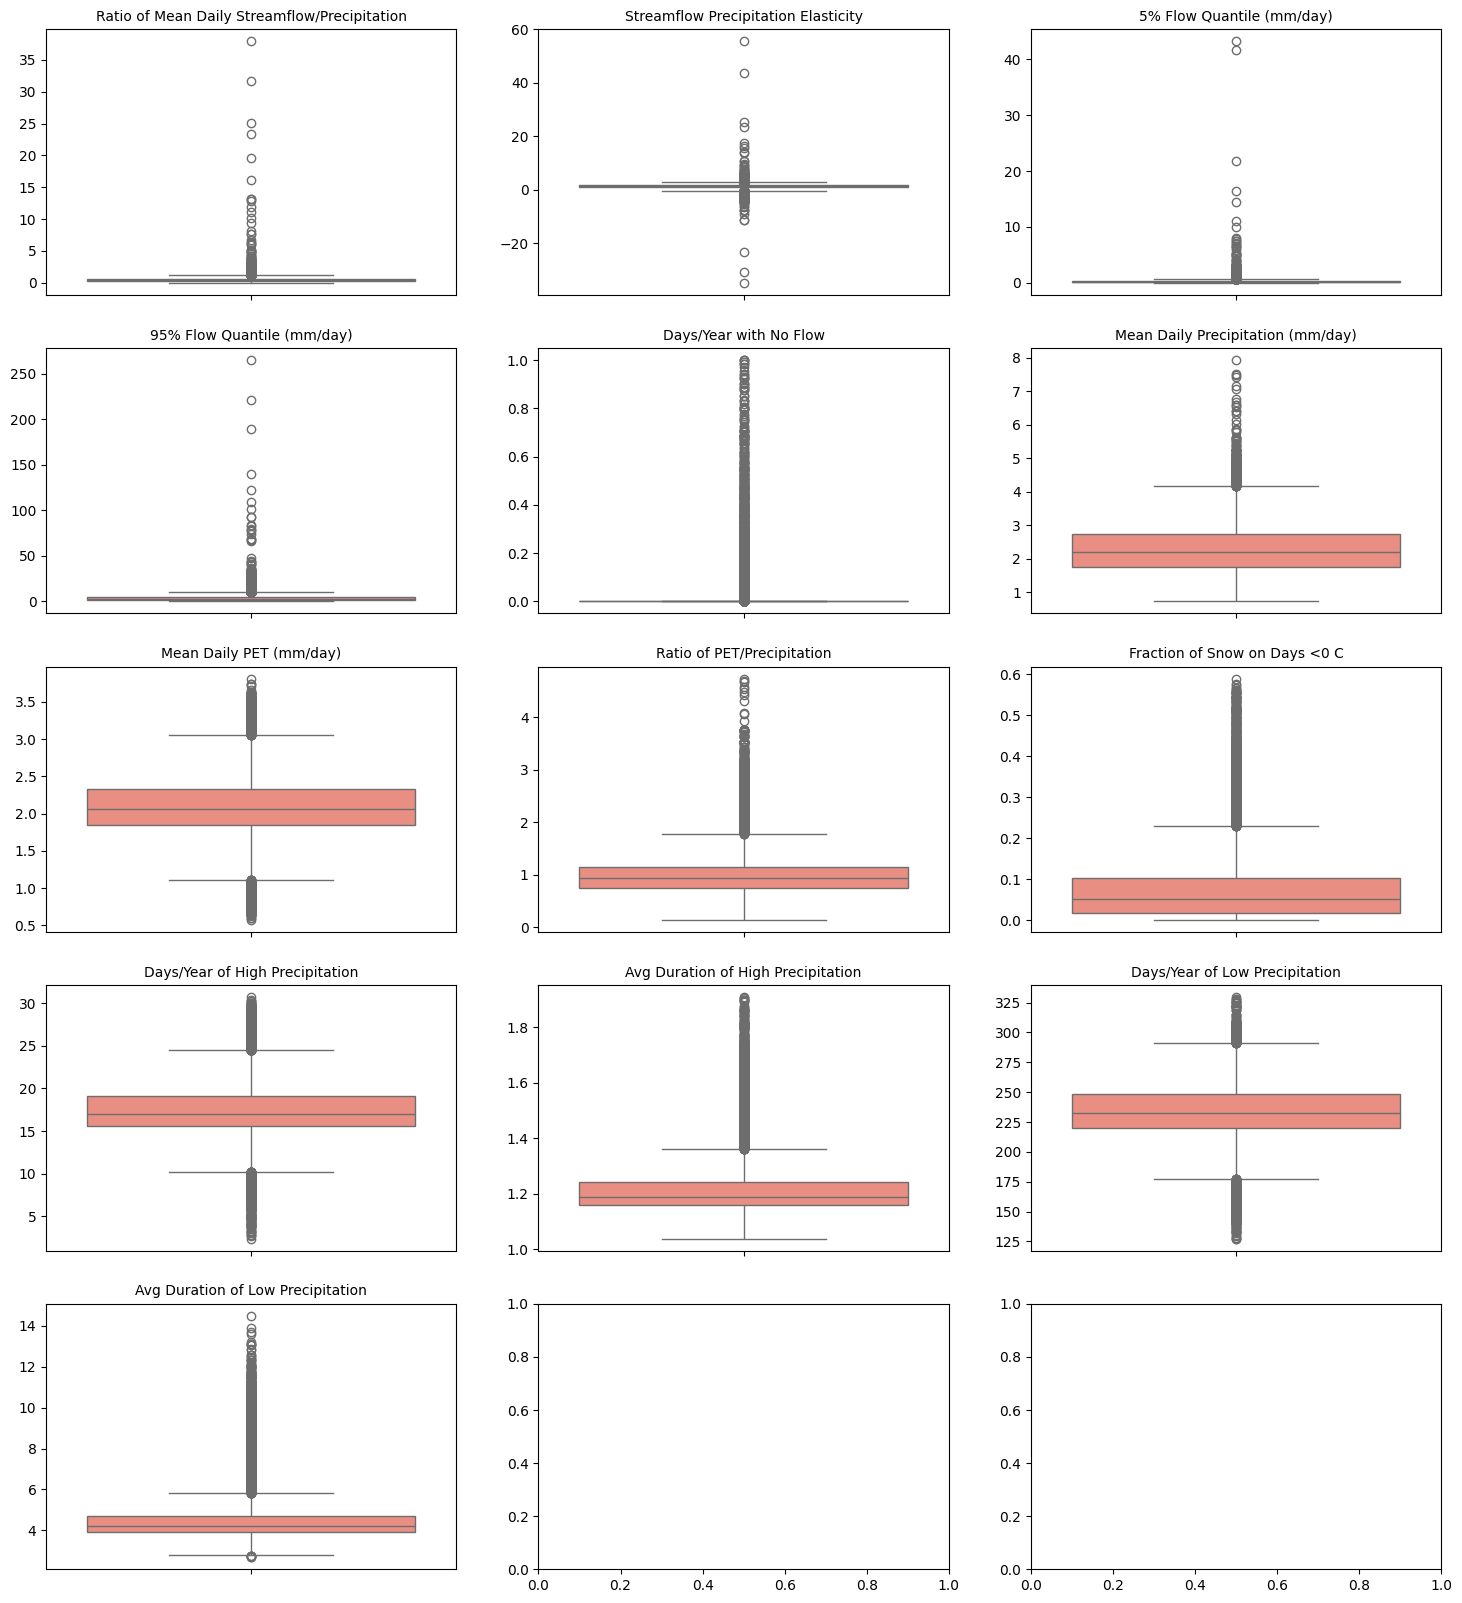

In [181]:
# Identify num of rows and col for boxplot grid
n_cols = 3
n_rows = (len(meteo_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(meteo_cols):
    ax = axes[i]
    sns.boxplot(data=static_df, y=col, ax=ax, color = 'salmon')  # or add `x='region'` if needed
    ax.set_title(col, fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

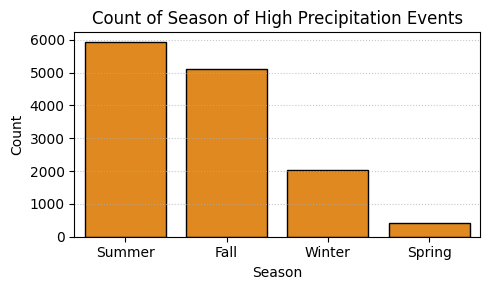

In [58]:
# Plot bar plot of high precip month
plt.figure(figsize=(5, 3))
sns.countplot(data=static_df, x='Season of High Precipitation Events',
              order=static_df['Season of High Precipitation Events'].value_counts().index,
              color = 'darkorange', edgecolor = 'k')
plt.title('Count of Season of High Precipitation Events')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

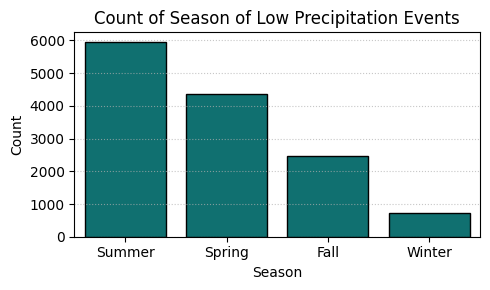

In [59]:
# Plot bar plot of low precip month
plt.figure(figsize=(5, 3))
sns.countplot(data=static_df, x='Season of Low Precipitation Events',
              order=static_df['Season of Low Precipitation Events'].value_counts().index,
              color = 'teal', edgecolor = 'k')
plt.title('Count of Season of Low Precipitation Events')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

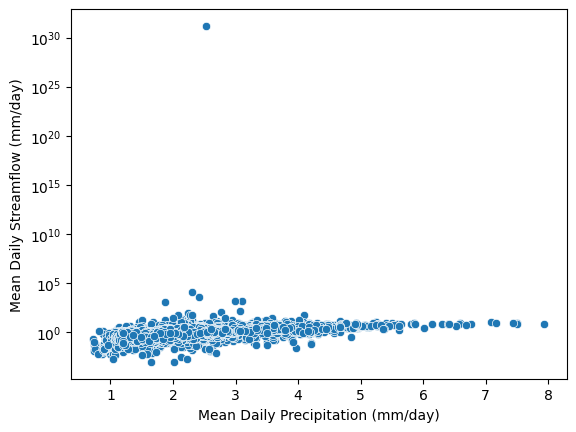

In [53]:
# Initial scatterplot of mean discharge vs mean precipitation
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Daily Precipitation (mm/day)')
plt.yscale('log')
plt.show()

Whoops! So clearly there is an outlier for streamflow. It is likely due to an incorrect data entry or something similar, so we'll just remove data that is unrealistic.

In [54]:
# Drop outlier row
static_df = static_df[static_df['Mean Daily Streamflow (mm/day)'] < 100] # Threshold based on group research

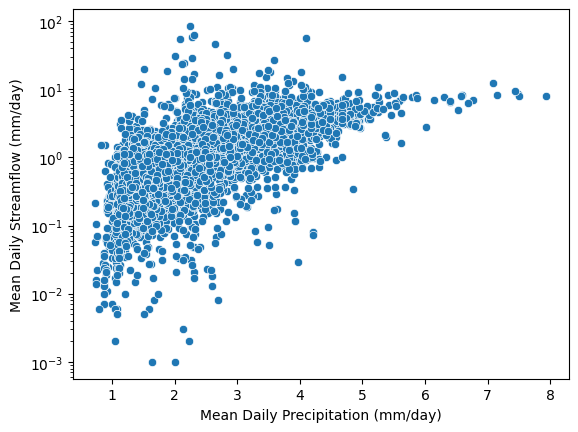

In [55]:
# Again: scatterplot of mean discharge vs mean precipitation
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Daily Precipitation (mm/day)')
plt.yscale('log')
plt.show()

#### Soil Static Attributes

In [60]:
# Identify columns of interest
root_depth_cols = [
    'Mean Root Depth (cm)',
    'Max Root Depth (cm)',
    'Min Root Depth (cm)',
    '5% Quantile Root Depth (cm)',
    '25% Quantile Root Depth (cm)',
    '50% Quantile Root Depth (cm)',
    '75% Quantile Root Depth (cm)',
    '90% Quantile Root Depth (cm)'
]

water_content_cols = [
    'Mean Available Water Content (mm)',
    'Max Available Water Content (mm)',
    'Min Available Water Content (mm)',
    '5% Quantile Water Content (mm)',
    '25% Quantile Water Content (mm)',
    '50% Quantile Water Content (mm)',
    '75% Quantile Water Content (mm)',
    '90% Quantile Water Content (mm)'
]

sand_cols = [
    'Mean % Sand in Soil',
    'Max % Sand in Soil',
    'Min % Sand in Soil',
    '5% Quantile % Sand in Soil',
    '25% Quantile % Sand in Soil',
    '50% Quantile % Sand in Soil',
    '75% Quantile % Sand in Soil',
    '90% Quantile % Sand in Soil'
]

silt_cols = [
    'Mean % Silt in Soil',
    'Max % Silt in Soil',
    'Min % Silt in Soil',
    '5% Quantile % Silt in Soil',
    '25% Quantile % Silt in Soil',
    '50% Quantile % Silt in Soil',
    '75% Quantile % Silt in Soil',
    '90% Quantile % Silt in Soil'
]

clay_cols = [
    'Mean % Clay in Soil',
    'Max % Clay in Soil',
    'Min % Clay in Soil',
    '5% Quantile % Clay in Soil',
    '25% Quantile % Clay in Soil',
    '50% Quantile % Clay in Soil',
    '75% Quantile % Clay in Soil',
    '90% Quantile % Clay in Soil'
]

gravel_cols = [
    'Mean % Gravel in Soil',
    'Max % Gravel in Soil',
    'Min % Gravel in Soil',
    '5% Quantile % Gravel in Soil',
    '25% Quantile % Gravel in Soil',
    '50% Quantile % Gravel in Soil',
    '75% Quantile % Gravel in Soil',
    '90% Quantile % Gravel in Soil'
]

bulk_dens_cols = [
    'Mean Soil Bulk Density (g/cm3)',
    'Max Soil Bulk Density (g/cm3)',
    'Min Soil Bulk Density (g/cm3)',
    '5% Quantile Soil Bulk Density (g/cm3)',
    '25% Quantile Soil Bulk Density (g/cm3)',
    '50% Quantile Soil Bulk Density (g/cm3)',
    '75% Quantile Soil Bulk Density (g/cm3)',
    '90% Quantile Soil Bulk Density (g/cm3)'
]

om_cols = [
    'Mean % Soil Organic Material',
    'Max % Soil Organic Material',
    'Min % Soil Organic Material',
    '5% Quantile % Soil Organic Material',
    '25% Quantile % Soil Organic Material',
    '50% Quantile % Soil Organic Material',
    '75% Quantile % Soil Organic Material',
    '90% Quantile % Soil Organic Material'
]


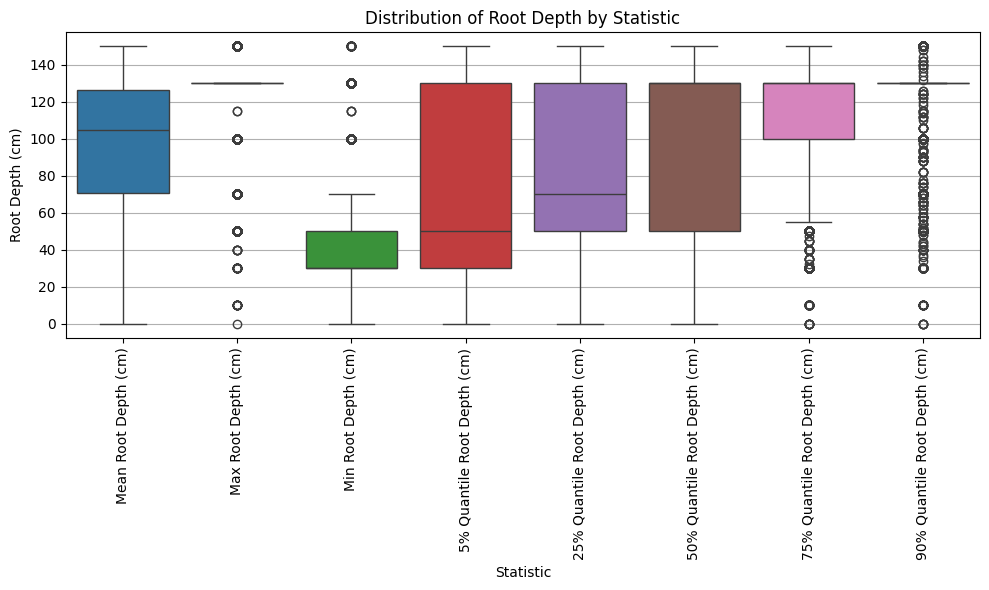

In [61]:
# Create boxplot of root depth stats
melted = static_df[root_depth_cols].melt(var_name='Statistic', value_name='Root Depth (cm)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='Root Depth (cm)', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of Root Depth by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

The mean root depth column looks good!

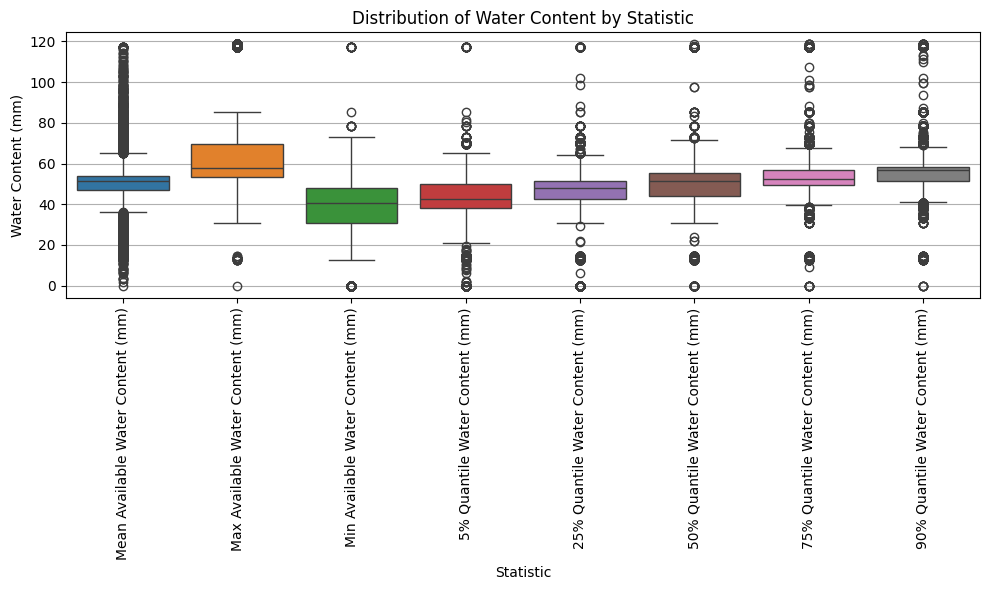

In [62]:
# Create boxplot of water content stats
melted = static_df[water_content_cols].melt(var_name='Statistic', value_name='Water Content (mm)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='Water Content (mm)', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of Water Content by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

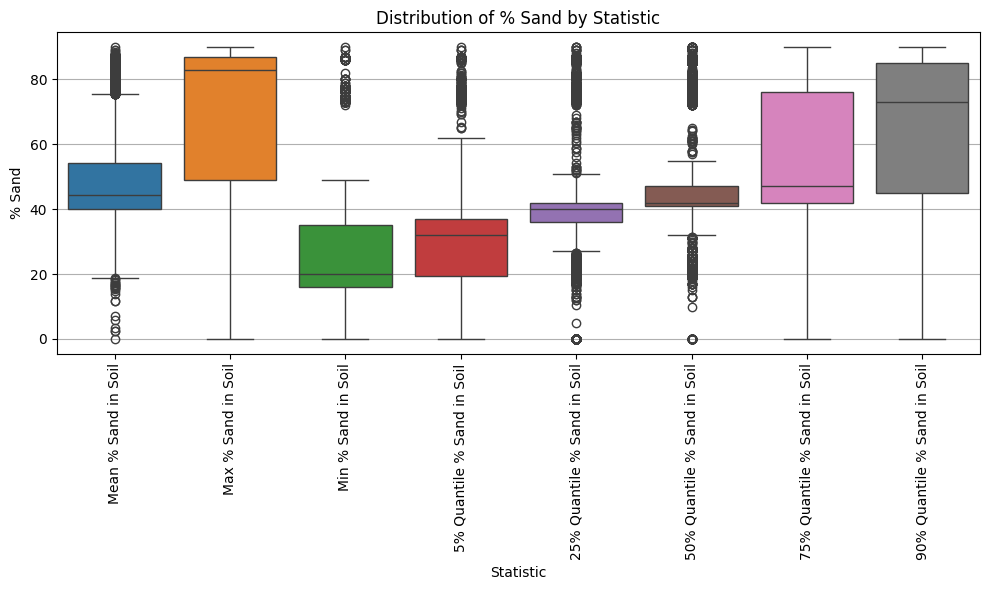

In [63]:
# Create boxplot of % sand stats
melted = static_df[sand_cols].melt(var_name='Statistic', value_name='% Sand')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Sand', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Sand by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

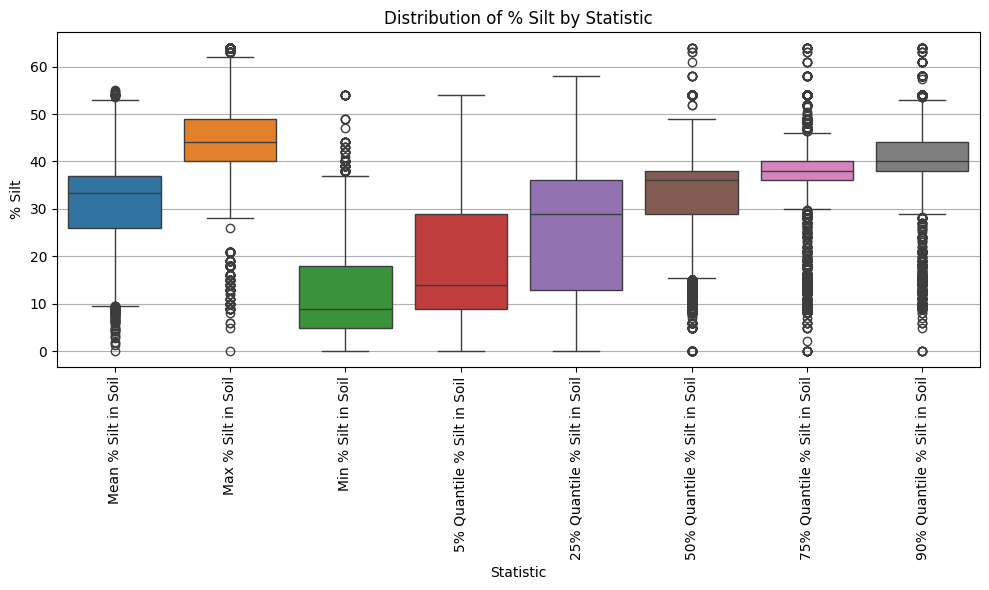

In [64]:
# Create boxplot of % silt stats
melted = static_df[silt_cols].melt(var_name='Statistic', value_name='% Silt')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Silt', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Silt by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

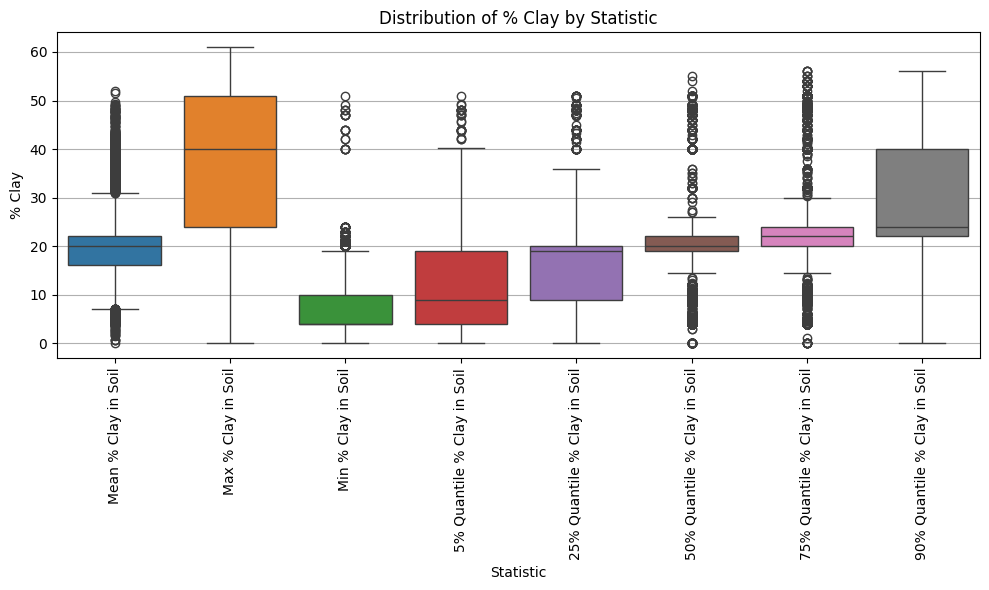

In [65]:
# Create boxplot of % clay stats
melted = static_df[clay_cols].melt(var_name='Statistic', value_name='% Clay')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Clay', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Clay by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

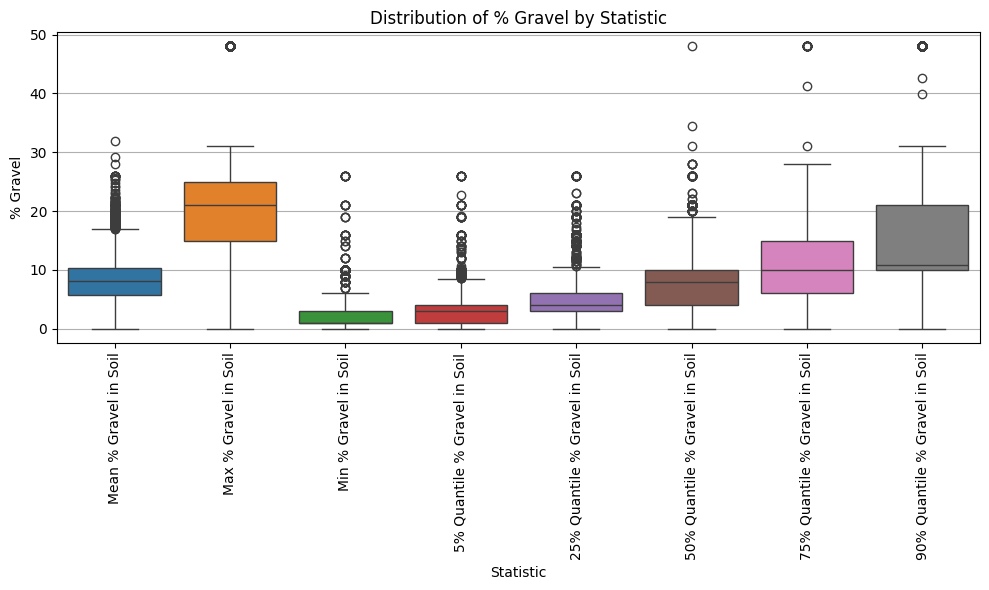

In [66]:
# Create boxplot of % gravel stats
melted = static_df[gravel_cols].melt(var_name='Statistic', value_name='% Gravel')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Gravel', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Gravel by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

**Major Takeaway:** Sand is the dominant particle size for this dataset.

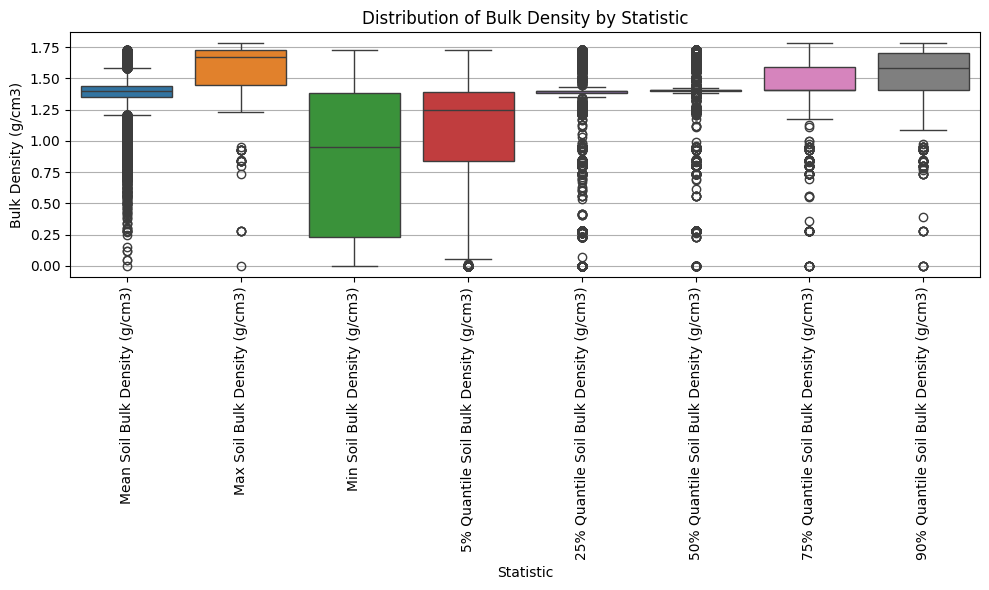

In [67]:
# Create boxplot of bulk density stats
melted = static_df[bulk_dens_cols].melt(var_name='Statistic', value_name='Bulk Density (g/cm3)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='Bulk Density (g/cm3)', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of Bulk Density by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

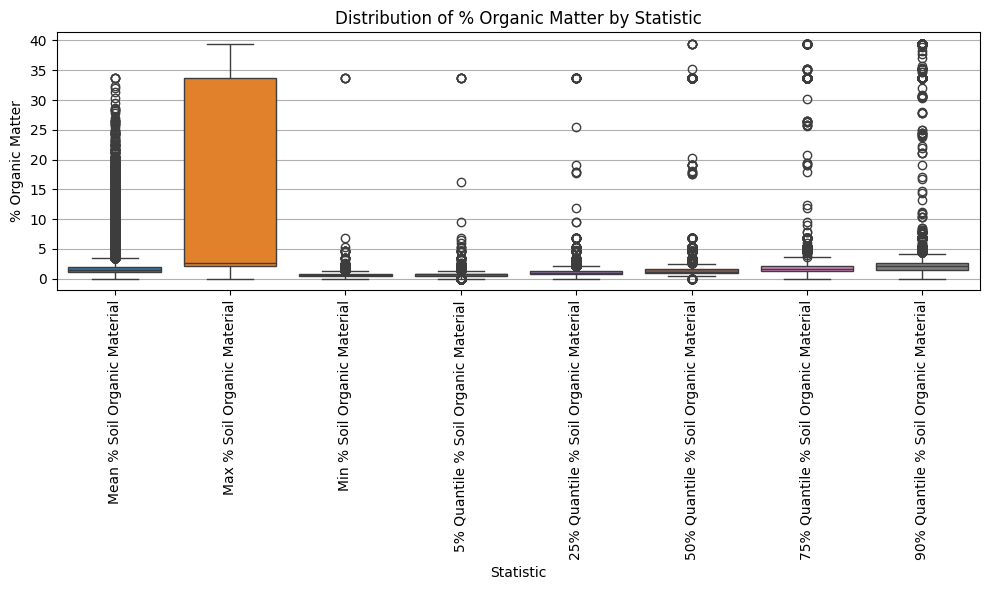

In [68]:
# Create boxplot of organic matter stats
melted = static_df[om_cols].melt(var_name='Statistic', value_name='% Organic Matter')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Organic Matter', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Organic Matter by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

#### Topography

In [69]:
# Identify columns of interest
topo_cols = [
    'Max Elevation (m)',
    'Mean Elevation (m)',
    'Min Elevation (m)',
    'Mean Terrain Slope (Degrees)',
    '% of Watershed Slope <3 Degrees',
    '% of Watershed Slope >15 Degrees',
    'Elongation Ratio',
    'Stream Density (1000km/km2)'
]

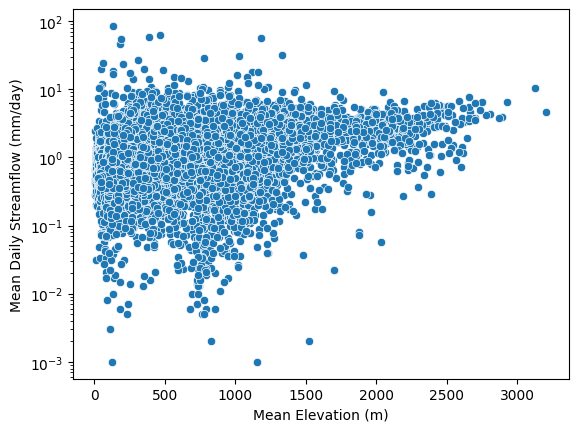

In [70]:
# scatterplot of mean discharge vs mean elevation
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Elevation (m)')
plt.yscale('log')
plt.show()

<ipython-input-71-430edc1623cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_df['Relief (m)'] = static_df['Max Elevation (m)'] - static_df['Min Elevation (m)']


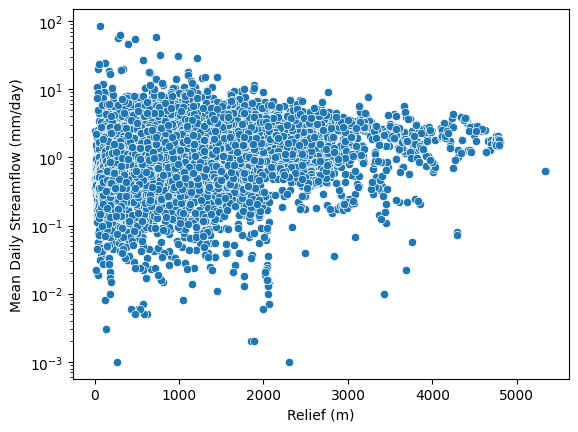

In [71]:
# Create a Relief (max - min elev) col
static_df['Relief (m)'] = static_df['Max Elevation (m)'] - static_df['Min Elevation (m)']

# scatterplot of mean discharge vs relief
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Relief (m)')
plt.yscale('log')
plt.show()

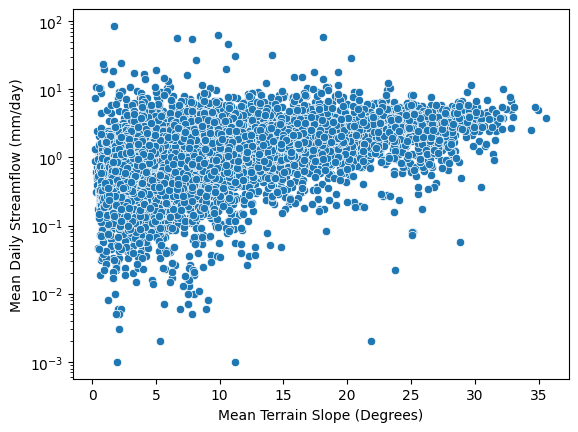

In [72]:
# scatterplot of mean discharge vs mean slope
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Terrain Slope (Degrees)')
plt.yscale('log')
plt.show()

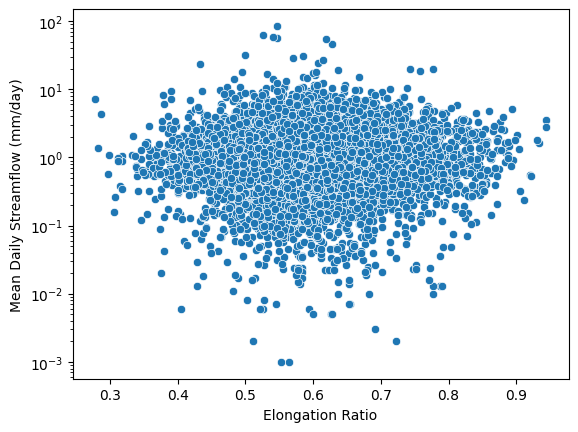

In [73]:
# scatterplot of mean discharge vs elongation ratio
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Elongation Ratio')
plt.yscale('log')
plt.show()

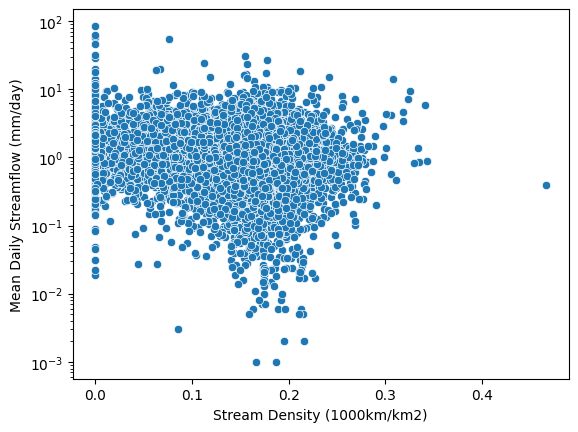

In [74]:
# scatterplot of mean discharge vs mean slope
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Stream Density (1000km/km2)')
plt.yscale('log')
plt.show()

#### Vegetation

In [75]:
# Identify columns of interest
lai_cols = [
    'Mean Jan Leaf-Area Index',
    'Mean Feb Leaf-Area Index',
    'Mean Mar Leaf-Area Index',
    'Mean Apr Leaf-Area Index',
    'Mean May Leaf-Area Index',
    'Mean Jun Leaf-Area Index',
    'Mean Jul Leaf-Area Index',
    'Mean Aug Leaf-Area Index',
    'Mean Sep Leaf-Area Index',
    'Mean Oct Leaf-Area Index',
    'Mean Nov Leaf-Area Index',
    'Mean Dec Leaf-Area Index',
    'Mean Leaf-Area Index',
]

ndvi_cols = [
    'Mean Jan NDVI',
    'Mean Feb NDVI',
    'Mean Mar NDVI',
    'Mean Apr NDVI',
    'Mean May NDVI',
    'Mean Jun NDVI',
    'Mean Jul NDVI',
    'Mean Aug NDVI',
    'Mean Sep NDVI',
    'Mean Oct NDVI',
    'Mean Nov NDVI',
    'Mean NDVI'
]

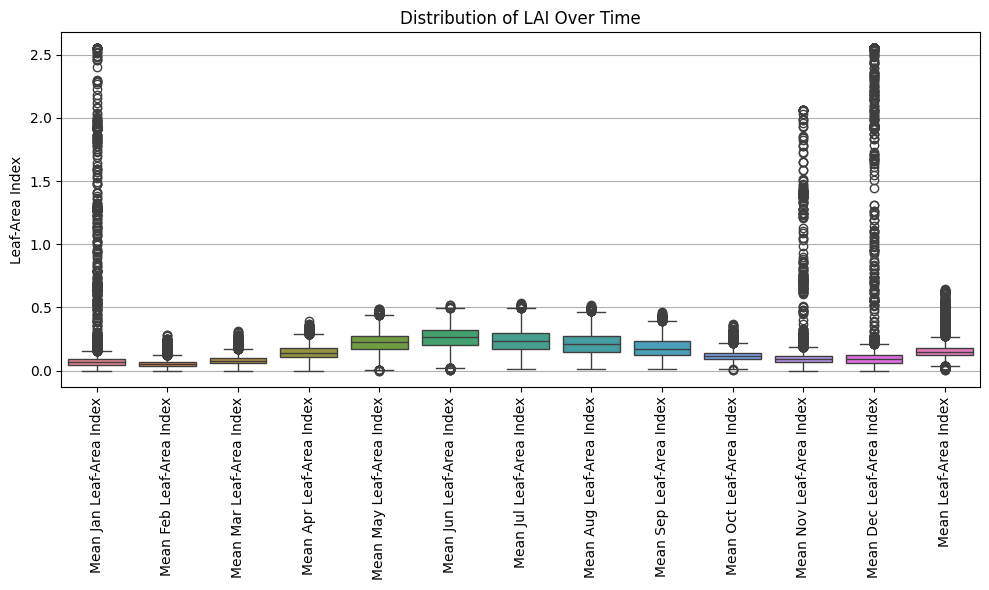

In [76]:
# Create boxplot of LAI
melted = static_df[lai_cols].melt(var_name='Month', value_name='Leaf-Area Index')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Leaf-Area Index', hue = 'Month')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Distribution of LAI Over Time')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

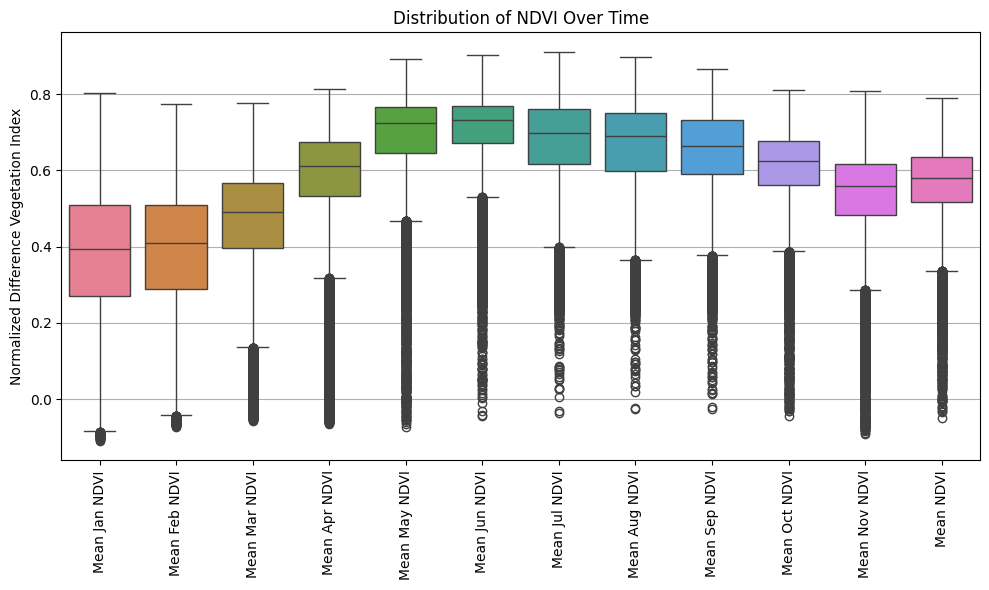

In [77]:
# Create boxplot of NDVI types
melted = static_df[ndvi_cols].melt(var_name='Month', value_name='Normalized Difference Vegetation Index')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Normalized Difference Vegetation Index', hue = 'Month')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Distribution of NDVI Over Time')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

### Step 2b. Clustering EDA
This EDA is specific to the proposed features for the clustering algorithm. Since clustering is an unsupervised algorithm, there won't be any set way to measure the success of the clustering nor the best selected features. Therefore, we will try to (reasonably) include the most varaibles possible. We can use dimensionality reduction for this.

#### Principal Component Analysis

In [156]:
# Scale data
scaler = RobustScaler()
cluster_data_helper_df = static_df.dropna(axis = 'rows')
cluster_data = static_df.dropna(axis = 'rows').select_dtypes(include='number')

# Fit and transform to x data
scaled_data = scaler.fit_transform(cluster_data)
scaled_data.shape

(13450, 138)

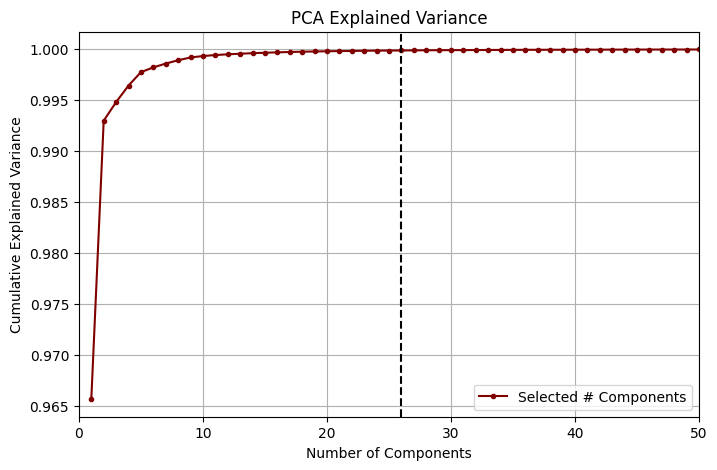

In [157]:
# Set the number of components
pca = PCA()
pca.fit(scaled_data)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='.', color = 'maroon', label = 'Selected # Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.xlim([0,50])
plt.axvline(x=26, color = 'k', linestyle = '--')
plt.grid(True)
plt.legend()
plt.show()

In [158]:
# Create PCA object with identified 26 components
pca = PCA(n_components = 26)
reduced_data = pca.fit_transform(scaled_data)

In [159]:
# Create a pandas df from pca array
pca_df = pd.DataFrame(reduced_data, columns = [f'PC{i+1}' for i in range(reduced_data.shape[1])])
# Add basin id
pca_df['Basin ID'] = cluster_data_helper_df['Basin ID'].values

In [164]:
# Check dataframe
pca_df

PC1        PC2        PC3        PC4        PC5        PC6  \
0     -26.296576 -11.072162  16.683298   1.472284  19.055239   3.092249   
1     -51.340916  -6.510196 -55.882312 -44.337288  18.585273   3.765024   
2     -50.474677  -6.047619 -30.276994 -28.287846  13.113644 -11.654023   
3     -51.341361  -6.521043 -55.950074 -44.490835  18.397728   3.189562   
4     -50.861718  -6.443459 -68.177501 -59.280250  22.030776  -7.659205   
...          ...        ...        ...        ...        ...        ...   
13445 -50.323522  -5.969974   2.391810   5.100900 -14.952160 -12.249127   
13446 -51.201424  -6.095032   0.957114  -3.510506 -45.019087 -18.295150   
13447 -51.115575  -6.167352   2.411368   5.159424 -14.868703 -12.249720   
13448 -50.599284  -5.161995   3.309241   6.477206  -8.835031  -4.236768   
13449 -49.863434  -4.880554   3.561542   7.359181  -5.574473  -7.585505   

             PC7        PC8        PC9      PC10      PC11      PC12  \
0       8.026287 -14.117964  -1.800399 -0.445187  2.270434  1.323703   
1     -18.223150 -11.514468 -11.651854  2.018868 -0.608758 -2.137840   
2      21.568931  12.581714   5.935312  2.140334 -0.457598 -1.697552   
3     -18.240727 -11.577405 -11.535536  1.239726 -0.525544 -2.521414   
4      17.294899  11.581908   2.562857  2.211134 -1.691912 -3.000860   
...          ...        ...        ...       ...       ...       ...   
13445  -5.843844  -0.423848  -3.422451 -5.846265  0.393174 -2.388512   
13446  -6.696202  -1.022921  -5.411154 -7.839107  1.293077 -1.017491   
13447  -5.894349  -0.417908  -3.397934 -5.927573  0.289979 -2.524799   
13448  -3.146920   0.212309  -3.538184 -5.242975  0.130423 -0.516873   
13449  -5.539077   0.504323  -2.499938 -1.899030 -1.090729 -2.618087   

           PC13      PC14       PC15      PC16      PC17      PC18      PC19  \
0      1.906336  1.621935 -10.793905 -2.608929  0.093100 -4.230662  0.940638   
1     -0.478933 -1.243205  -5.561232  0.452637  1.610751 -5.020090 -0.231734   
2     -1.318280 -1.561878  -5.239425  0.250194 -1.518773 -3.411596  0.378559   
3     -1.094120 -1.493080  -5.755164  1.573383  3.654225 -8.019325 -0.592967   
4     -2.087883 -3.472220  -4.458580  1.061377  0.714376 -5.598113 -0.421879   
...         ...       ...        ...       ...       ...       ...       ...   
13445 -2.486219 -2.211091   5.080159  2.805927  0.641228 -1.334876 -2.094539   
13446 -1.984442  0.515317   0.483378 -0.429826 -0.646123  1.557732 -1.137456   
13447 -2.309461 -2.255786   4.357395  2.735786 -0.457557 -2.105796 -2.147068   
13448  3.383085  2.734969   8.578938  3.655121 -1.278735 -4.899430 -5.897013   
13449 -0.110348 -3.541323   2.784242  2.142289  0.501541 -3.377516 -5.041929   

           PC20      PC21      PC22      PC23      PC24      PC25      PC26  \
0      1.756905 -5.394590  0.742630  2.117557  2.450197 -1.258469  0.999428   
1     -2.512809 -5.204098  2.132583  3.296155  2.367212 -0.182974 -0.270035   
2      0.200001 -7.594926  2.195962  2.997595  2.340740 -0.453122  0.258318   
3     -2.434343 -4.687981  2.729033  3.893168  2.268884  0.550187 -2.529198   
4      0.709170 -4.250651  2.782877  2.857927  1.925102 -0.235374 -0.647254   
...         ...       ...       ...       ...       ...       ...       ...   
13445 -2.646611  0.633658  0.448559 -6.168909  6.352745 -1.152101  1.895861   
13446 -2.892268  0.459953 -1.046528 -0.609479 -0.008846  0.475942 -1.683249   
13447 -4.868995  2.471263  2.533919 -5.914283  7.176533 -0.345673  0.052386   
13448 -5.934496  1.158564  6.250898  1.971062 -0.002799  1.422809 -3.175724   
13449 -6.332080 -0.305126  4.207877  2.499123 -1.828293  2.045077 -5.266267   

       Basin ID  
0      AT000001  
1      AT000002  
2      AT000003  
3      AT000004  
4      AT000005  
...         ...  
13445  UAGR0017  
13446  UAGR0018  
13447  UAGR0019  
13448  UAGR0020  
13449  UAGR0021  

[13450 rows x 27 columns]

#### Final Clustering Dataset

**Note:** For some clustering algorithms, like KMeans, we might want to scale again before implementation.

### Step 2c. Mean Regression EDA
This EDA is specific to the proposed features for the mean regression algorithm. The target is *Mean Daily Streamflow (mm/day)*.

#### Histogram of Target

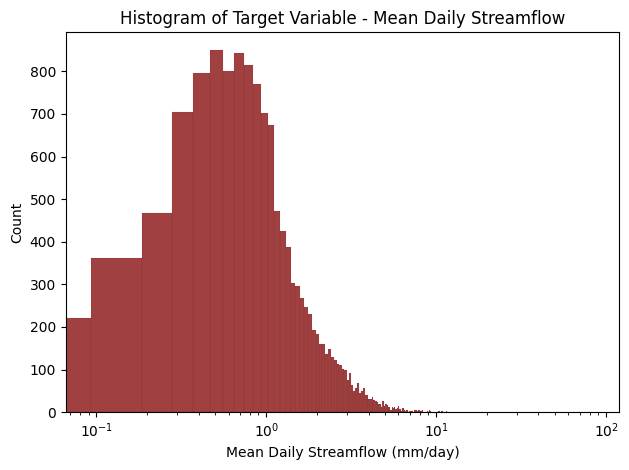

In [105]:
# Create a histogram of target for regression
sns.histplot(data = num_df3, x = 'Mean Daily Streamflow (mm/day)',
             color = 'maroon')
plt.xscale('log')
plt.title("Histogram of Target Variable - Mean Daily Streamflow")
plt.tight_layout()
plt.show()

Overall, this looks relatively good.

#### Correlation Analysis

Let's start out with some correlation analysis. We will select features based on professional knowledge as well as the Spearman correlation coefficient, which is often helpful in environmental datasets given its monotonic nature.

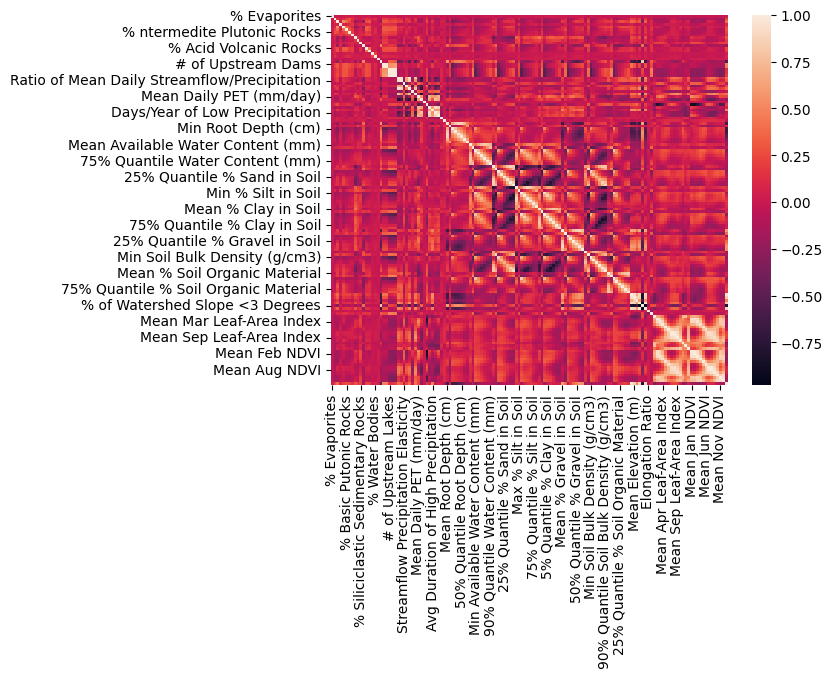

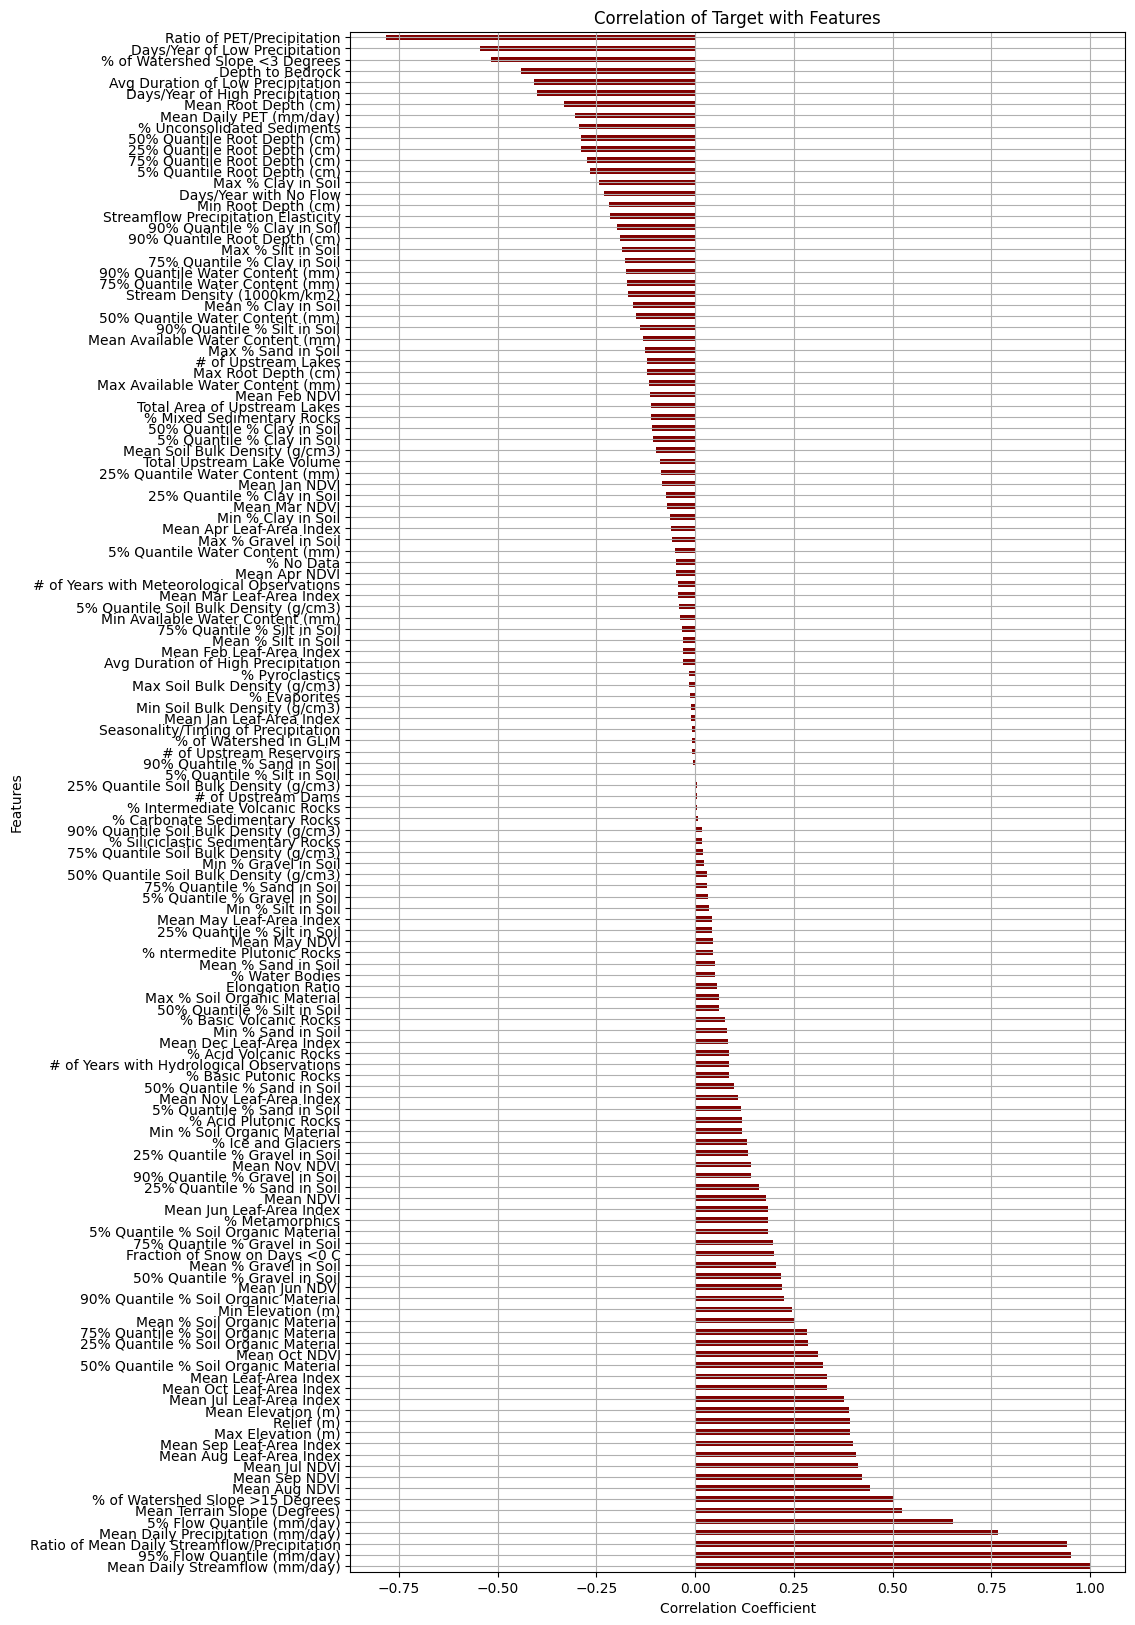

In [80]:
# Create correlation matrix and heatmap

# Select for only numerical values
num_df = static_df.select_dtypes(include='number')
corr = num_df.corr(method = 'spearman')
# Print correlation plot
sns.heatmap(corr)

# Select the target value row
target_corr = corr.loc['Mean Daily Streamflow (mm/day)'].sort_values(ascending = False)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 20))
target_corr.plot(kind='barh', color='maroon')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title(f'Correlation of Target with Features')
plt.grid()
plt.show()

Great! We're already seeing a lot of high correlations, as well as some we already anticipated. Let's look at the top 60 for now.

In [81]:
# Sort values in correlation matrix
target_corr_abs = target_corr.abs()
target_corr_abs = target_corr_abs.sort_values(ascending = False)

# Pick top 60 from the series
top_corr = target_corr_abs[0:60]
top_corr

Mean Daily Streamflow (mm/day)                  1.000000
95% Flow Quantile (mm/day)                      0.951784
Ratio of Mean Daily Streamflow/Precipitation    0.940800
Ratio of PET/Precipitation                      0.784273
Mean Daily Precipitation (mm/day)               0.767477
5% Flow Quantile (mm/day)                       0.652487
Days/Year of Low Precipitation                  0.546072
Mean Terrain Slope (Degrees)                    0.523976
% of Watershed Slope <3 Degrees                 0.516790
% of Watershed Slope >15 Degrees                0.503373
Mean Aug NDVI                                   0.443948
Depth to Bedrock                                0.441537
Mean Sep NDVI                                   0.422101
Mean Jul NDVI                                   0.412586
Avg Duration of Low Precipitation               0.408840
Mean Aug Leaf-Area Index                        0.407537
Days/Year of High Precipitation                 0.400769
Mean Sep Leaf-Area Index                        0.399940
Max Elevation (m)                               0.393224
Relief (m)                                      0.392812
Mean Elevation (m)                              0.390622
Mean Jul Leaf-Area Index                        0.377340
Mean Oct Leaf-Area Index                        0.334750
Mean Leaf-Area Index                            0.334252
Mean Root Depth (cm)                            0.333089
50% Quantile % Soil Organic Material            0.323916
Mean Oct NDVI                                   0.310628
Mean Daily PET (mm/day)                         0.304254
% Unconsolidated Sediments                      0.294594
50% Quantile Root Depth (cm)                    0.288816
25% Quantile Root Depth (cm)                    0.288103
25% Quantile % Soil Organic Material            0.285277
75% Quantile % Soil Organic Material            0.282866
75% Quantile Root Depth (cm)                    0.273380
5% Quantile Root Depth (cm)                     0.265822
Mean % Soil Organic Material                    0.252301
Min Elevation (m)                               0.244340
Max % Clay in Soil                              0.243444
Days/Year with No Flow                          0.229728
90% Quantile % Soil Organic Material            0.225988
Mean Jun NDVI                                   0.220004
Min Root Depth (cm)                             0.218402
50% Quantile % Gravel in Soil                   0.216094
Streamflow Precipitation Elasticity             0.216022
Mean % Gravel in Soil                           0.205793
Fraction of Snow on Days <0 C                   0.200592
90% Quantile % Clay in Soil                     0.197700
75% Quantile % Gravel in Soil                   0.196836
90% Quantile Root Depth (cm)                    0.190675
5% Quantile % Soil Organic Material             0.185565
Max % Silt in Soil                              0.184924
% Metamorphics                                  0.183685
Mean Jun Leaf-Area Index                        0.183273
Mean NDVI                                       0.178401
75% Quantile % Clay in Soil                     0.177685
90% Quantile Water Content (mm)                 0.176064
75% Quantile Water Content (mm)                 0.172271
Stream Density (1000km/km2)                     0.171095
25% Quantile % Sand in Soil                     0.161467
Mean % Clay in Soil                             0.157832
Name: Mean Daily Streamflow (mm/day), dtype: float64

Since some columns have multple repeats of a characteristic, such as multiple statistics, we're going to look at a heatmap of correlations to check for multicolinearity.

In [82]:
# Turn identified features into a list
selected_features = top_corr.index.tolist()

# Select correlation matrix for only selected_features
filtered_corr1 = corr.loc[selected_features, selected_features]
top_corrs_df = static_df[selected_features]

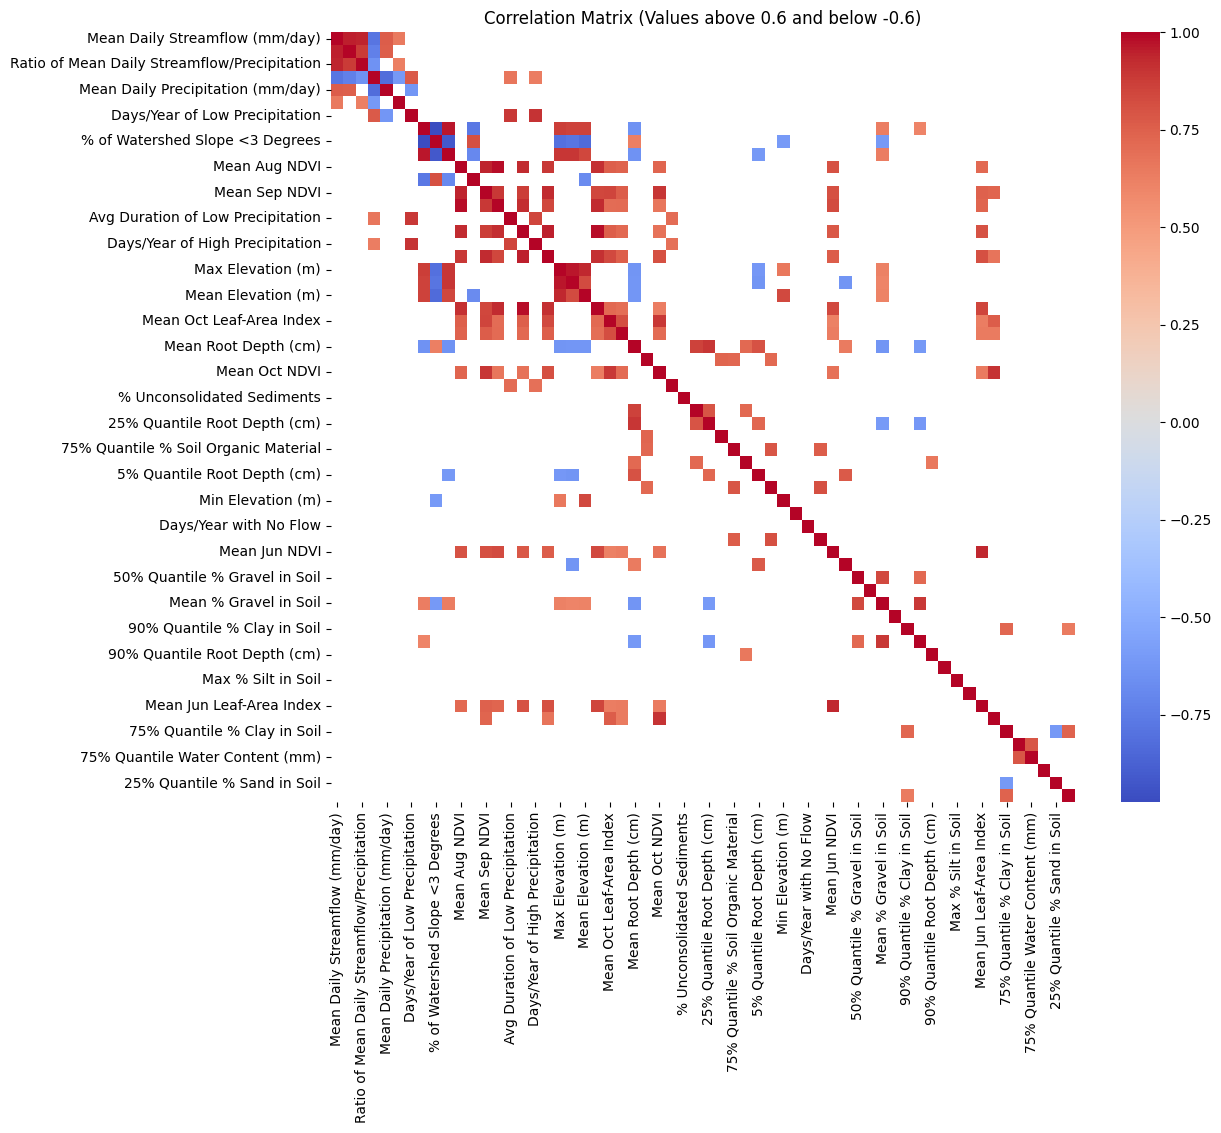

Mean Daily Streamflow (mm/day)  \
Mean Daily Streamflow (mm/day)                                      1.000000   
95% Flow Quantile (mm/day)                                          0.951784   
Ratio of Mean Daily Streamflow/Precipitation                        0.940800   
Ratio of PET/Precipitation                                         -0.784273   
Mean Daily Precipitation (mm/day)                                   0.767477   
5% Flow Quantile (mm/day)                                           0.652487   
Days/Year of Low Precipitation                                           NaN   
Mean Terrain Slope (Degrees)                                             NaN   
% of Watershed Slope <3 Degrees                                          NaN   
% of Watershed Slope >15 Degrees                                         NaN   
Mean Aug NDVI                                                            NaN   
Depth to Bedrock                                                         NaN   
Mean Sep NDVI                                                            NaN   
Mean Jul NDVI                                                            NaN   
Avg Duration of Low Precipitation                                        NaN   
Mean Aug Leaf-Area Index                                                 NaN   
Days/Year of High Precipitation                                          NaN   
Mean Sep Leaf-Area Index                                                 NaN   
Max Elevation (m)                                                        NaN   
Relief (m)                                                               NaN   
Mean Elevation (m)                                                       NaN   
Mean Jul Leaf-Area Index                                                 NaN   
Mean Oct Leaf-Area Index                                                 NaN   
Mean Leaf-Area Index                                                     NaN   
Mean Root Depth (cm)                                                     NaN   
50% Quantile % Soil Organic Material                                     NaN   
Mean Oct NDVI                                                            NaN   
Mean Daily PET (mm/day)                                                  NaN   
% Unconsolidated Sediments                                               NaN   
50% Quantile Root Depth (cm)                                             NaN   
25% Quantile Root Depth (cm)                                             NaN   
25% Quantile % Soil Organic Material                                     NaN   
75% Quantile % Soil Organic Material                                     NaN   
75% Quantile Root Depth (cm)                                             NaN   
5% Quantile Root Depth (cm)                                              NaN   
Mean % Soil Organic Material                                             NaN   
Min Elevation (m)                                                        NaN   
Max % Clay in Soil                                                       NaN   
Days/Year with No Flow                                                   NaN   
90% Quantile % Soil Organic Material                                     NaN   
Mean Jun NDVI                                                            NaN   
Min Root Depth (cm)                                                      NaN   
50% Quantile % Gravel in Soil                                            NaN   
Streamflow Precipitation Elasticity                                      NaN   
Mean % Gravel in Soil                                                    NaN   
Fraction of Snow on Days <0 C                                            NaN   
90% Quantile % Clay in Soil                                              NaN   
75% Quantile % Gravel in Soil                                            NaN   
90% Quantile Root Depth (cm)                                             NaN   
5% Quantile % Soil Organic Material           

In [83]:
# Filter correlation matrix for values above 0.6 and below -0.6
high_corr1 = filtered_corr1[(filtered_corr1 > 0.6) | (filtered_corr1 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(12,10))
sns.heatmap(high_corr1,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

# Print correlation values
high_corr1

In [84]:
# Unstack the matrix to get pairwise correlations
high_corr_pairs = high_corr1.unstack().dropna()

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)]
high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated()]

# Sort by absolute correlation
high_corr_pairs = high_corr_pairs.reindex(high_corr_pairs.abs().sort_values(ascending=False).index)

# Temporarily increase display limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(high_corr_pairs)

Mean Aug NDVI                                 Mean Jul NDVI                                   0.981735
Mean Jul NDVI                                 Mean Aug NDVI                                   0.981735
Mean Aug Leaf-Area Index                      Mean Jul Leaf-Area Index                        0.980069
Mean Jul Leaf-Area Index                      Mean Aug Leaf-Area Index                        0.980069
% of Watershed Slope <3 Degrees               Mean Terrain Slope (Degrees)                   -0.975162
Mean Terrain Slope (Degrees)                  % of Watershed Slope <3 Degrees                -0.975162
                                              % of Watershed Slope >15 Degrees                0.965506
% of Watershed Slope >15 Degrees              Mean Terrain Slope (Degrees)                    0.965506
Max Elevation (m)                             Relief (m)                                      0.961588
Relief (m)                                    Max Elevation (m)          

In [85]:
# Initial trim of df
num_df2 = top_corrs_df.drop(columns = [
    'Mean Jun NDVI',
    'Mean Jun Leaf-Area Index',
    'Mean Jul NDVI',
    'Mean Jul Leaf-Area Index',
    'Mean Sep NDVI',
    'Mean Sep Leaf-Area Index',
    'Mean Oct NDVI',
    'Mean Oct Leaf-Area Index',
    '% of Watershed Slope <3 Degrees',
    '% of Watershed Slope >15 Degrees',
    'Max Elevation (m)',
    '95% Flow Quantile (mm/day)',
    'Ratio of Mean Daily Streamflow/Precipitation',
    'Days/Year of High Precipitation',
    '25% Quantile Root Depth (cm)',
    'Avg Duration of Low Precipitation',
    '75% Quantile % Gravel in Soil',
    '50% Quantile Root Depth (cm)',
    '50% Quantile % Gravel in Soil',
    'Min Elevation (m)',
    'Mean Daily Precipitation (mm/day)',
    'Mean Daily PET (mm/day)', # captured in ratio of pet/precip
    '90% Quantile % Soil Organic Material',
    '5% Quantile Root Depth (cm)',
    '25% Quantile Root Depth (cm)',
    '75% Quantile % Soil Organic Material',
    '75% Quantile Water Content (mm)'
])

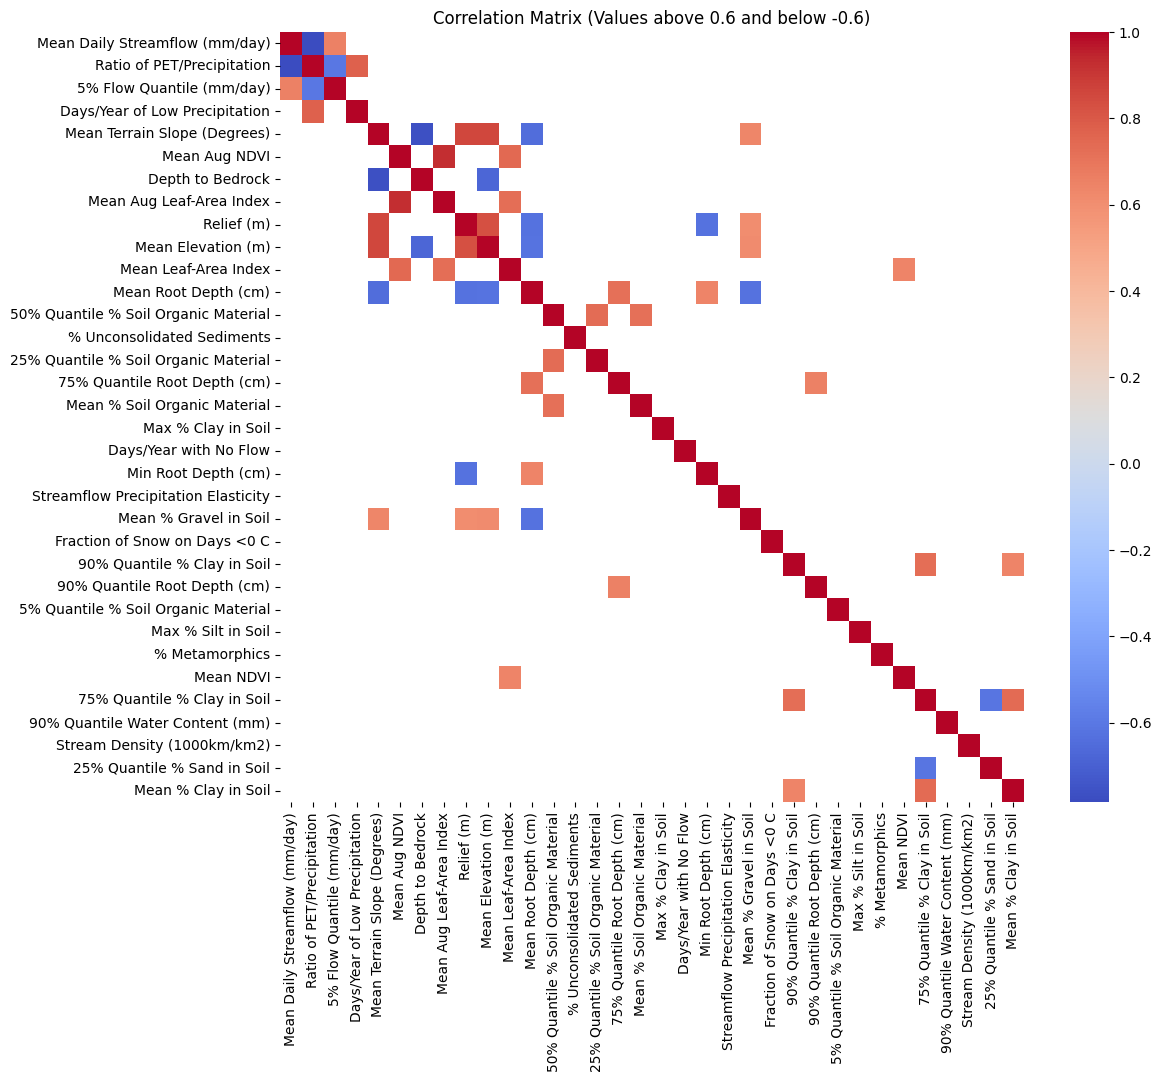

In [86]:
# Again: Filter correlation matrix for values above 0.6 and below -0.6
corr2 = num_df2.corr(method = 'spearman')
high_corr2 = corr2[(corr2 > 0.6) | (corr2 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(12,10))
sns.heatmap(high_corr2,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

In [87]:
# Unstack the matrix to get pairwise correlations
high_corr_pairs = high_corr2.unstack().dropna()

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)]
high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated()]

# Sort by absolute correlation
high_corr_pairs = high_corr_pairs.reindex(high_corr_pairs.abs().sort_values(ascending=False).index)

# Temporarily increase display limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(high_corr_pairs)

Mean Aug Leaf-Area Index              Mean Aug NDVI                           0.927972
Mean Aug NDVI                         Mean Aug Leaf-Area Index                0.927972
Mean Terrain Slope (Degrees)          Relief (m)                              0.859405
Relief (m)                            Mean Terrain Slope (Degrees)            0.859405
Mean Elevation (m)                    Mean Terrain Slope (Degrees)            0.856610
Mean Terrain Slope (Degrees)          Mean Elevation (m)                      0.856610
Mean Elevation (m)                    Relief (m)                              0.829748
Relief (m)                            Mean Elevation (m)                      0.829748
Mean Daily Streamflow (mm/day)        Ratio of PET/Precipitation             -0.784273
Ratio of PET/Precipitation            Mean Daily Streamflow (mm/day)         -0.784273
                                      Days/Year of Low Precipitation          0.771887
Days/Year of Low Precipitation        Ratio

In [98]:
# Drop selected features
num_df3 = num_df2.drop(columns = [
    'Mean Aug Leaf-Area Index',
    'Relief (m)',
    'Days/Year of Low Precipitation',
    'Depth to Bedrock',
    'Mean Leaf-Area Index',
    '75% Quantile % Clay in Soil',
    '25% Quantile % Soil Organic Material',
    '90% Quantile % Clay in Soil', # keep max % clay in soil
    '75% Quantile Root Depth (cm)',
    '50% Quantile % Soil Organic Material',
    '5% Flow Quantile (mm/day)',
    'Min Root Depth (cm)'
])

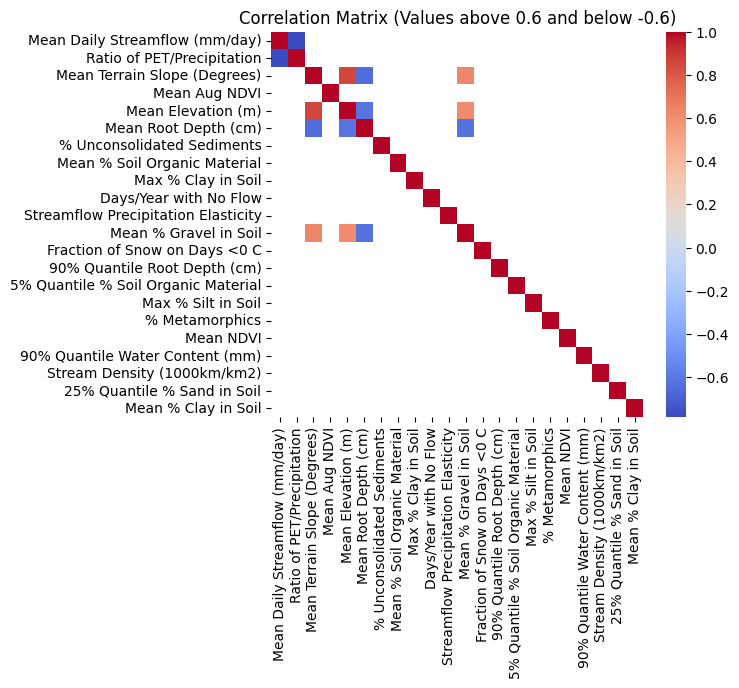

In [99]:
# Again: Filter correlation matrix for values above 0.6 and below -0.6
corr3 = num_df3.corr(method = 'spearman')
high_corr3 = corr3[(corr3 > 0.6) | (corr3 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(6,5))
sns.heatmap(high_corr3,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

In [100]:
# Show final df
# Unstack the matrix to get pairwise correlations
high_corr_pairs = high_corr3.unstack().dropna()

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)]
high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated()]

# Sort by absolute correlation
high_corr_pairs = high_corr_pairs.reindex(high_corr_pairs.abs().sort_values(ascending=False).index)

# Temporarily increase display limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(high_corr_pairs)

Mean Elevation (m)              Mean Terrain Slope (Degrees)      0.856610
Mean Terrain Slope (Degrees)    Mean Elevation (m)                0.856610
Ratio of PET/Precipitation      Mean Daily Streamflow (mm/day)   -0.784273
Mean Daily Streamflow (mm/day)  Ratio of PET/Precipitation       -0.784273
Mean Terrain Slope (Degrees)    Mean Root Depth (cm)             -0.647284
Mean Root Depth (cm)            Mean Terrain Slope (Degrees)     -0.647284
Mean Terrain Slope (Degrees)    Mean % Gravel in Soil             0.637133
Mean % Gravel in Soil           Mean Terrain Slope (Degrees)      0.637133
Mean Root Depth (cm)            Mean % Gravel in Soil            -0.628823
Mean % Gravel in Soil           Mean Root Depth (cm)             -0.628823
Mean Elevation (m)              Mean Root Depth (cm)             -0.620559
Mean Root Depth (cm)            Mean Elevation (m)               -0.620559
Mean Elevation (m)              Mean % Gravel in Soil             0.610932
Mean % Gravel in Soil    

This is good for now. We have some odd/almost redundant features in the dataset, so we're going to only select the features that seem appropriate given our EDA. A less complex model can often be more powerful.

In [116]:
# Identify final regression columns
reg_model_cols = [
    'Basin ID',
    'Mean Daily Streamflow (mm/day)',
    'Ratio of PET/Precipitation',
    'Mean Terrain Slope (Degrees)',
    'Mean Aug NDVI',
    'Mean Elevation (m)',
    'Mean Root Depth (cm)',
    '% Unconsolidated Sediments',
    'Mean % Soil Organic Material',
    'Days/Year with No Flow',
    'Fraction of Snow on Days <0 C',
    'Max % Silt in Soil',
    '% Metamorphics',
    '90% Quantile Water Content (mm)',
    'Stream Density (1000km/km2)',
    '25% Quantile % Sand in Soil',
    'Mean % Clay in Soil',
    'Mean Soil Bulk Density (g/cm3)', # Personal additions
    'Lithological Dominant Class'
]

# Create reg model df
reg_model_df = static_df[reg_model_cols].dropna() # Based on findings from clustering

In [184]:
# Describe df
reg_model_df

Basin ID  Mean Daily Streamflow (mm/day)  Ratio of PET/Precipitation  \
0      AT000001                           2.824                       0.395   
1      AT000002                           3.898                       0.390   
2      AT000003                           0.915                       0.411   
3      AT000004                           5.079                       0.384   
4      AT000005                           3.319                       0.448   
...         ...                             ...                         ...   
13511  UAGR0017                           0.150                       1.354   
13512  UAGR0018                           0.475                       1.270   
13513  UAGR0019                           0.312                       1.494   
13514  UAGR0020                           0.075                       1.856   
13515  UAGR0021                           0.598                       1.640   

       Mean Terrain Slope (Degrees)  Mean Aug NDVI  Mean Elevation (m)  \
0                            24.122          0.645            1874.076   
1                            26.095          0.696            1773.178   
2                            25.735          0.655            1843.003   
3                            27.324          0.657            1890.429   
4                            28.647          0.612            1772.902   
...                             ...            ...                 ...   
13511                        11.810          0.796             564.291   
13512                        19.438          0.689             749.565   
13513                         9.655          0.694             653.127   
13514                         1.223          0.425             155.662   
13515                         2.584          0.526             234.422   

       Mean Root Depth (cm)  % Unconsolidated Sediments  \
0                    81.571                      22.064   
1                    58.600                       0.000   
2                    51.660                       0.070   
3                    49.412                       0.000   
4                    31.781                       0.000   
...                     ...                         ...   
13511               128.620                       0.000   
13512                73.061                       0.000   
13513               130.000                       0.000   
13514               130.000                       0.000   
13515               130.000                       0.000   

       Mean % Soil Organic Material  Days/Year with No Flow  \
0                             1.218                   0.000   
1                             1.820                   0.000   
2                             1.714                   0.000   
3                             1.771                   0.000   
4                             1.836                   0.000   
...                             ...                     ...   
13511                         1.198                   0.777   
13512                         2.340                   0.834   
13513                         1.178                   0.651   
13514                         2.094                   0.543   
13515                         2.090                   0.000   

       Fraction of Snow on Days <0 C  Max % Silt in Soil  % Metamorphics  \
0                              0.326                64.0          23.464   
1                              0.332                44.0          88.549   
2                              0.337                44.0          84.653   
3                              0.361                44.0          59.940   
4                              0.200                44.0          15.582   
...                              ...                 ...             ...   
13511                          0.183                45.0           0.000   
13512                          0.198                45.0           0.000   
13513              

Let's also test out the sci-kit learn tool for selecting features based on our target model, XGBoost.

In [174]:
# Identify x and y dfs
X = cluster_data.drop(columns = 'Mean Daily Streamflow (mm/day)')
X.columns = X.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
y = cluster_data[['Mean Daily Streamflow (mm/day)']]

# Set up the model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Use feature importances for selection
selector = SelectFromModel(estimator=xgb, threshold="median")
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['% Metamorphics', '% Acid Plutonic Rocks',
       '% ntermedite Plutonic Rocks', '% Carbonate Sedimentary Rocks',
       '% Mixed Sedimentary Rocks', '% Siliciclastic Sedimentary Rocks',
       'Depth to Bedrock', 'Total Area of Upstream Lakes',
       'Ratio of Mean Daily Streamflow/Precipitation',
       'Streamflow Precipitation Elasticity', '5% Flow Quantile (mm/day)',
       '95% Flow Quantile (mm/day)', 'Days/Year with No Flow',
       'Mean Daily Precipitation (mm/day)', 'Mean Daily PET (mm/day)',
       'Ratio of PET/Precipitation', 'Seasonality/Timing of Precipitation',
       'Days/Year of Low Precipitation', 'Avg Duration of Low Precipitation',
       '# of Years with Hydrological Observations', 'Max Root Depth (cm)',
       '75% Quantile Root Depth (cm)', '90% Quantile Root Depth (cm)',
       'Mean Available Water Content (mm)', '50% Quantile Water Content (mm)',
       '75% Quantile Water Content (mm)', 'Max % Sand in Soil',
       'Min % Sand in Soil', '5% Quantil

As we can see from the above results and earlier correlation EDA, the selected features using the SelectFromModel function selects features that are too highly correlated, causing falsely accurate predictions later on. We will stick with our original selection.

## Step 3. Transformations

### Step 3a. Categorical Columns

Since the lithological dominant class column has a lot of minority classes, we'll turn them into an "other" class for model building.

In [185]:
# Define num of classes
top_n = 6
top_classes = reg_model_df['Lithological Dominant Class'].value_counts().nlargest(top_n).index

# Regroup into 'other'
reg_model_df['Lithological Dominant Class (Grouped)'] = reg_model_df['Lithological Dominant Class'].where(reg_model_df['Lithological Dominant Class'].isin(top_classes), other='other')
reg_model_df = reg_model_df.drop(columns = ['Lithological Dominant Class'])

KeyError: 'Lithological Dominant Class'

In [183]:

reg_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13506 entries, 0 to 13515
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Basin ID                               13506 non-null  object 
 1   Mean Daily Streamflow (mm/day)         13506 non-null  float64
 2   Ratio of PET/Precipitation             13506 non-null  float64
 3   Mean Terrain Slope (Degrees)           13506 non-null  float64
 4   Mean Aug NDVI                          13506 non-null  float64
 5   Mean Elevation (m)                     13506 non-null  float64
 6   Mean Root Depth (cm)                   13506 non-null  float64
 7   % Unconsolidated Sediments             13506 non-null  float64
 8   Mean % Soil Organic Material           13506 non-null  float64
 9   Days/Year with No Flow                 13506 non-null  float64
 10  Fraction of Snow on Days <0 C          13506 non-null  float64
 11  Max % S

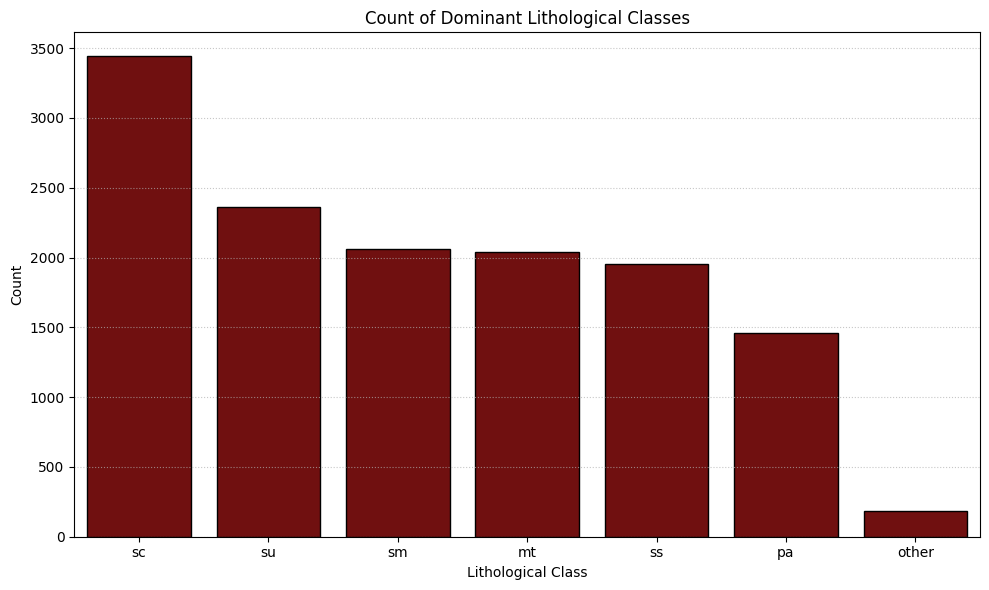

In [128]:
# Plot bar plot of dominant lithological class
plt.figure(figsize=(10, 6))
sns.countplot(data=reg_model_df, x='Lithological Dominant Class (Grouped)',
              order=reg_model_df['Lithological Dominant Class (Grouped)'].value_counts().index,
              color = 'maroon', edgecolor = 'k')
plt.title('Count of Dominant Lithological Classes')
plt.xlabel('Lithological Class')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

### Feature Transformation
We will explore transforming the feature sets to more closely follow a Gaussian distribution. We will use visual and statistical methods to select the best transformation tested. We will test:
- log
- square root
- power
- box-cox
- reciprocal
- Yeo-Johnson Power Transformation
- Normal Quantile Transformation

We will go through each feature individually below.

In [188]:
# Define function for applying transformations
def apply_transformation(data, transform):
    if transform == 'log':
        return np.log(data + 1)
    elif transform == 'sqrt':
        return np.sqrt(data)
    elif transform == 'cbrt':
        return np.power(data, 1/3)
    elif transform == 'boxcox':
        if (data > 0).all():
            return stats.boxcox(data)[0]
        else:
            return None
    elif transform == 'reciprocal':
        return 1 / (data + 1)
    elif transform == 'yeo_johnson':
        pt = PowerTransformer(method='yeo-johnson')
        return pt.fit_transform(data.values.reshape(-1, 1)).flatten()
    elif transform == 'quantile_normal':
        qt = QuantileTransformer(output_distribution='normal')
        return qt.fit_transform(data.values.reshape(-1, 1)).flatten()
    else:
        return data

# Define function for evaluating normality based on statistical measures (Shapiro and Anderson)
def evaluate_normality(data):
    shapiro_stat, shapiro_p_value = stats.shapiro(data)
    ad_stat, ad_critical_values, ad_significance_level = stats.anderson(data, dist='norm')
    return {
        'shapiro_stat': shapiro_stat,
        'shapiro_p_value': shapiro_p_value,
        'ad_stat': ad_stat,
        'ad_significance_level': ad_significance_level
    }

# Define function that uses apply_transformation and evaluate_normality to visualize and test for normality
def normality(data, feature):
    transformations = {
        'Original': None,
        'Log': 'log',
        'Square Root': 'sqrt',
        'Cube Root': 'cbrt',
        'Box-Cox': 'boxcox',
        'Reciprocal': 'reciprocal',
        'Yeo-Johnson': 'yeo_johnson',
        'Quantile Normal': 'quantile_normal'
    }

    results = {}

    fig, axes = plt.subplots(len(transformations), 2, figsize=(8, 4 * len(transformations)))

    # Handle infinite values in the original data
    original_data = data[feature].replace([np.inf, -np.inf], np.nan).dropna()

    for i, (name, transform) in enumerate(transformations.items()):
        if transform is None:
            transformed_data = original_data
        else:
            transformed_data = apply_transformation(original_data, transform)
            if transformed_data is None:
                axes[i, 0].set_visible(False)
                axes[i, 1].set_visible(False)
                continue

        # Plot two normality plots -> KDE and Q-Q
        sns.kdeplot(transformed_data, ax=axes[i, 0])
        axes[i, 0].set_title(f'{name} KDE')
        stats.probplot(transformed_data, plot=axes[i, 1])
        axes[i, 1].set_title(f'{name} Q-Q plot')

        # Evaluate normality
        result = evaluate_normality(transformed_data)
        results[name] = result

    plt.tight_layout()
    plt.show()

    # Print the results
    for name, result in results.items():
        print(f'{name} Transformation:')
        print(f'  Shapiro-Wilk Test Statistic = {result["shapiro_stat"]:.4f}, p-value = {result["shapiro_p_value"]:.4f}')
        print(f'  Anderson-Darling Test Statistic = {result["ad_stat"]:.4f}, Significance Level = {result["ad_significance_level"]}\n')

    # Find and print the best transformation based on Shapiro-Wilk Test
    best_transformation = max(results, key=lambda x: results[x]['shapiro_stat'])
    print(f'Best transformation according to Shapiro-Wilk Test: {best_transformation}')

    # Find and print the best transformation based on Anderson-Darling Test
    best_ad_transformation = min(results, key=lambda x: results[x]['ad_stat'])
    print(f'Best transformation according to Anderson-Darling Test: {best_ad_transformation}')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

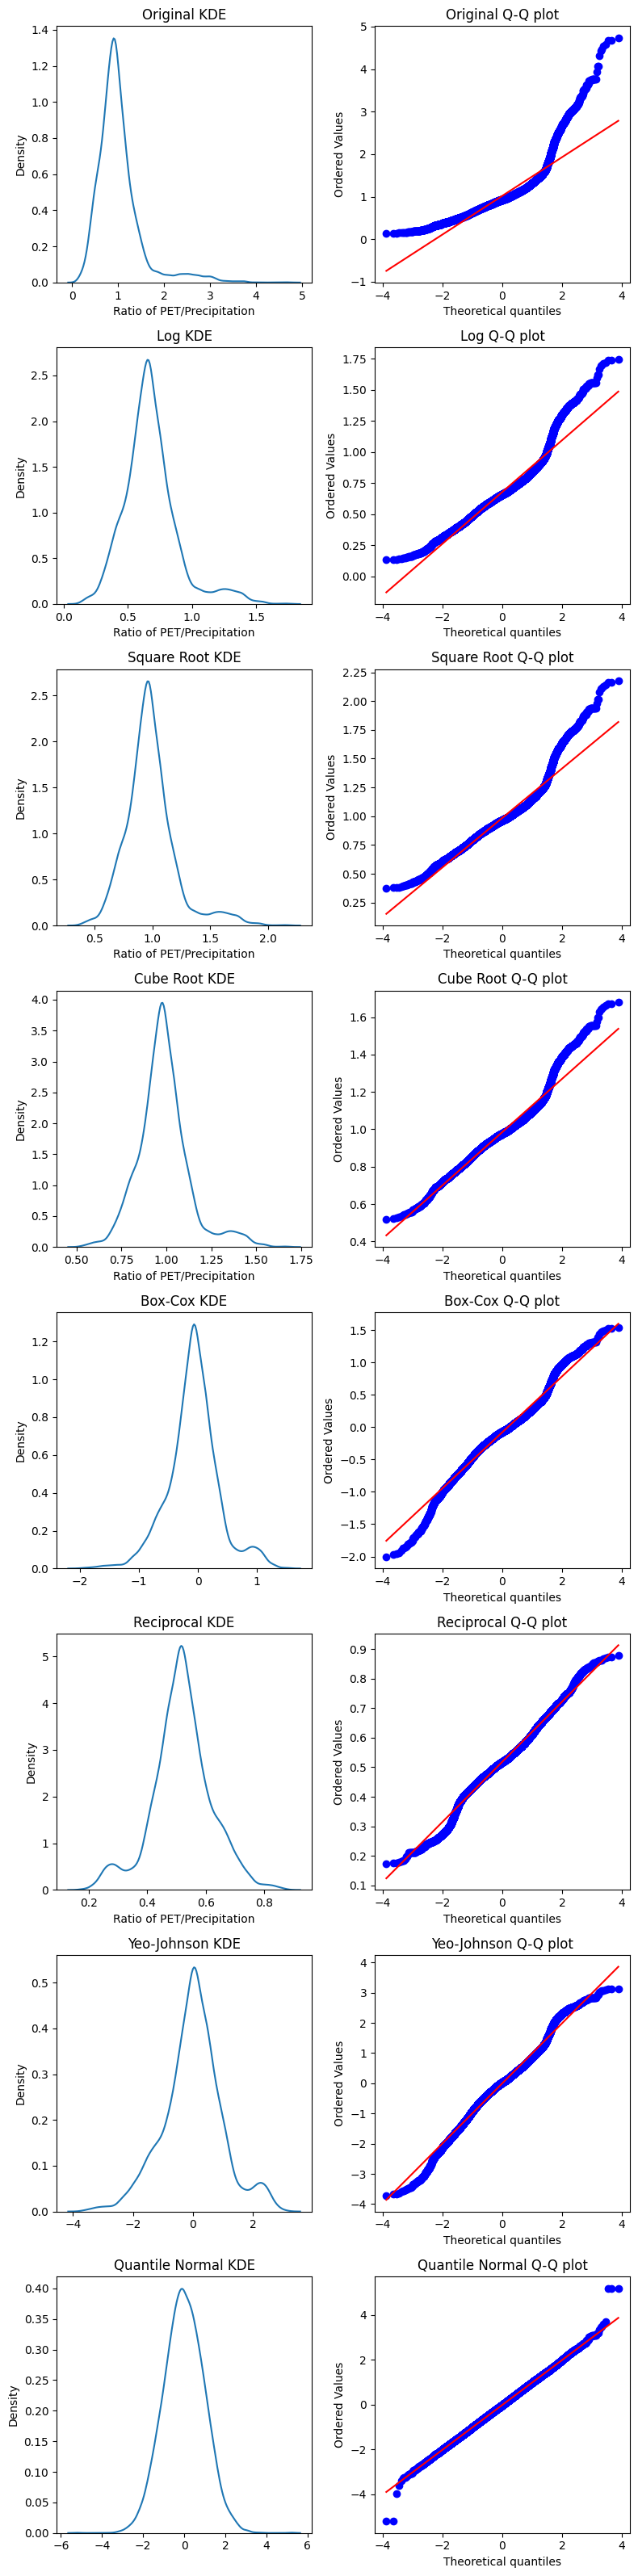

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.8153, p-value = 0.0000
  Anderson-Darling Test Statistic = 588.7349, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.9352, p-value = 0.0000
  Anderson-Darling Test Statistic = 208.9997, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = 0.9287, p-value = 0.0000
  Anderson-Darling Test Statistic = 233.6346, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = 0.9534, p-value = 0.0000
  Anderson-Darling Test Statistic = 166.4080, Significance Level = [15.  10.   5.   2.5  1. ]

Box-Cox Transformation:
  Shapiro-Wilk Test Statistic = 0.9759, p-value = 0.0000
  Anderson-Darling Test Statistic = 107.1302, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.9847, p-value = 0.0000
  Anderson-Darling Test Statistic

In [189]:
# Normality of PET/Precipitation
normality(reg_model_df, 'Ratio of PET/Precipitation')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

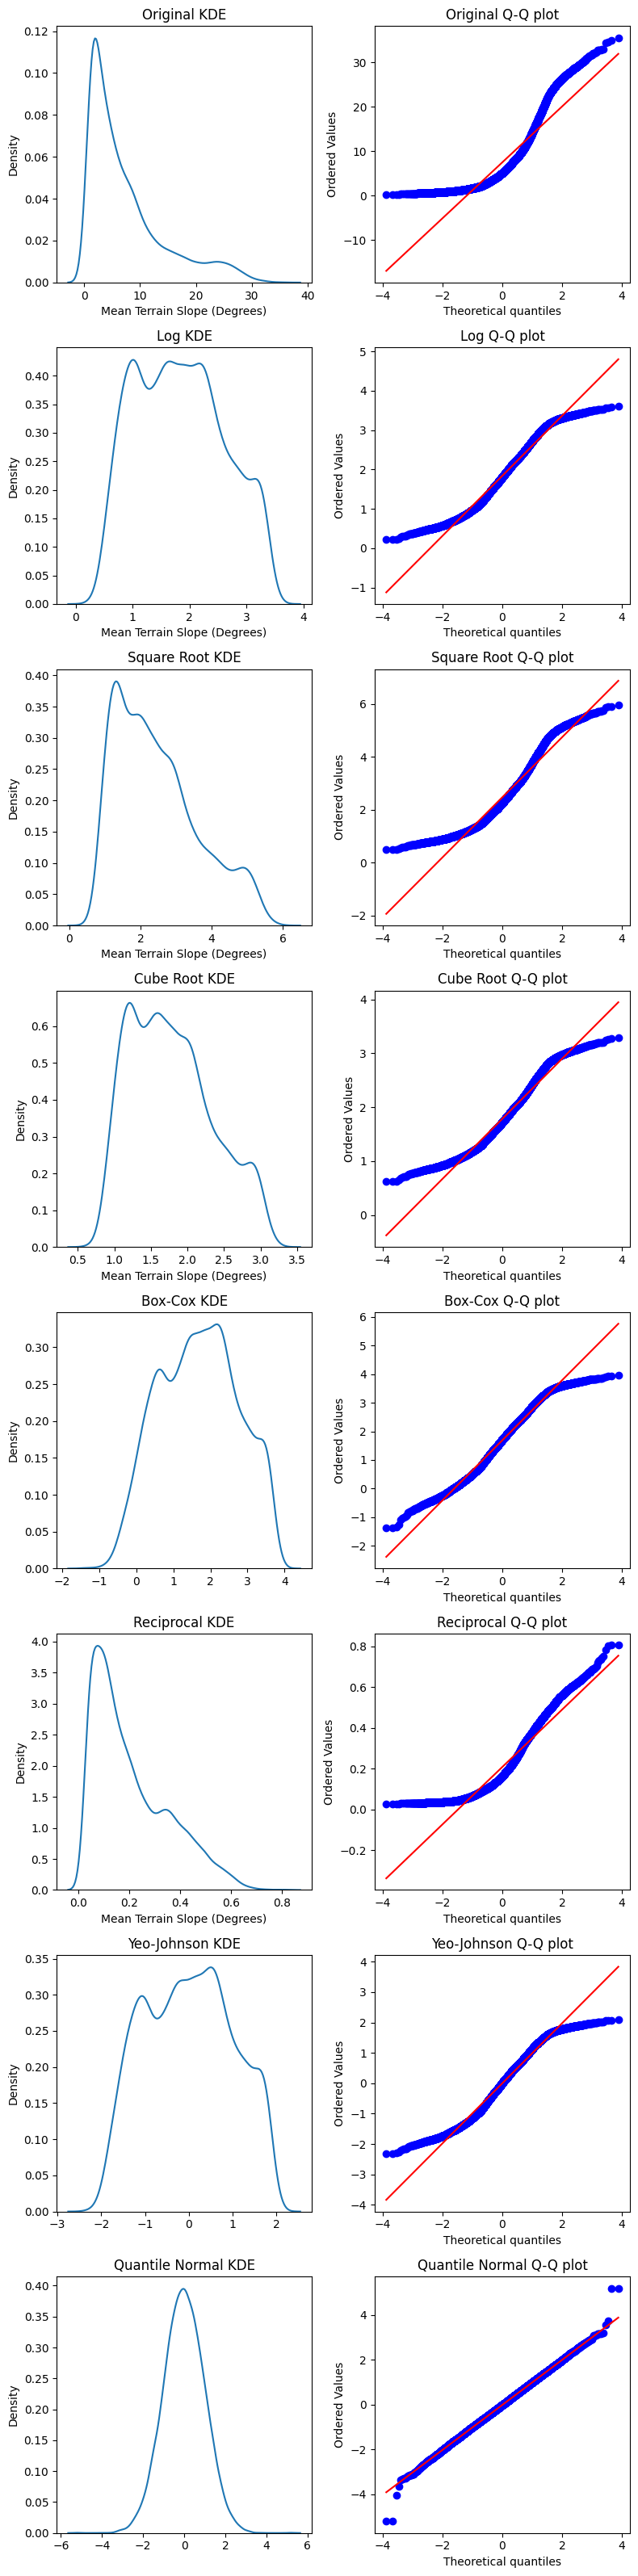

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.8341, p-value = 0.0000
  Anderson-Darling Test Statistic = 729.3979, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.9723, p-value = 0.0000
  Anderson-Darling Test Statistic = 84.1496, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = 0.9414, p-value = 0.0000
  Anderson-Darling Test Statistic = 220.8802, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = 0.9654, p-value = 0.0000
  Anderson-Darling Test Statistic = 117.1737, Significance Level = [15.  10.   5.   2.5  1. ]

Box-Cox Transformation:
  Shapiro-Wilk Test Statistic = 0.9829, p-value = 0.0000
  Anderson-Darling Test Statistic = 47.8125, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.9049, p-value = 0.0000
  Anderson-Darling Test Statistic =

In [191]:
# Normality slope
normality(reg_model_df, 'Mean Terrain Slope (Degrees)')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not

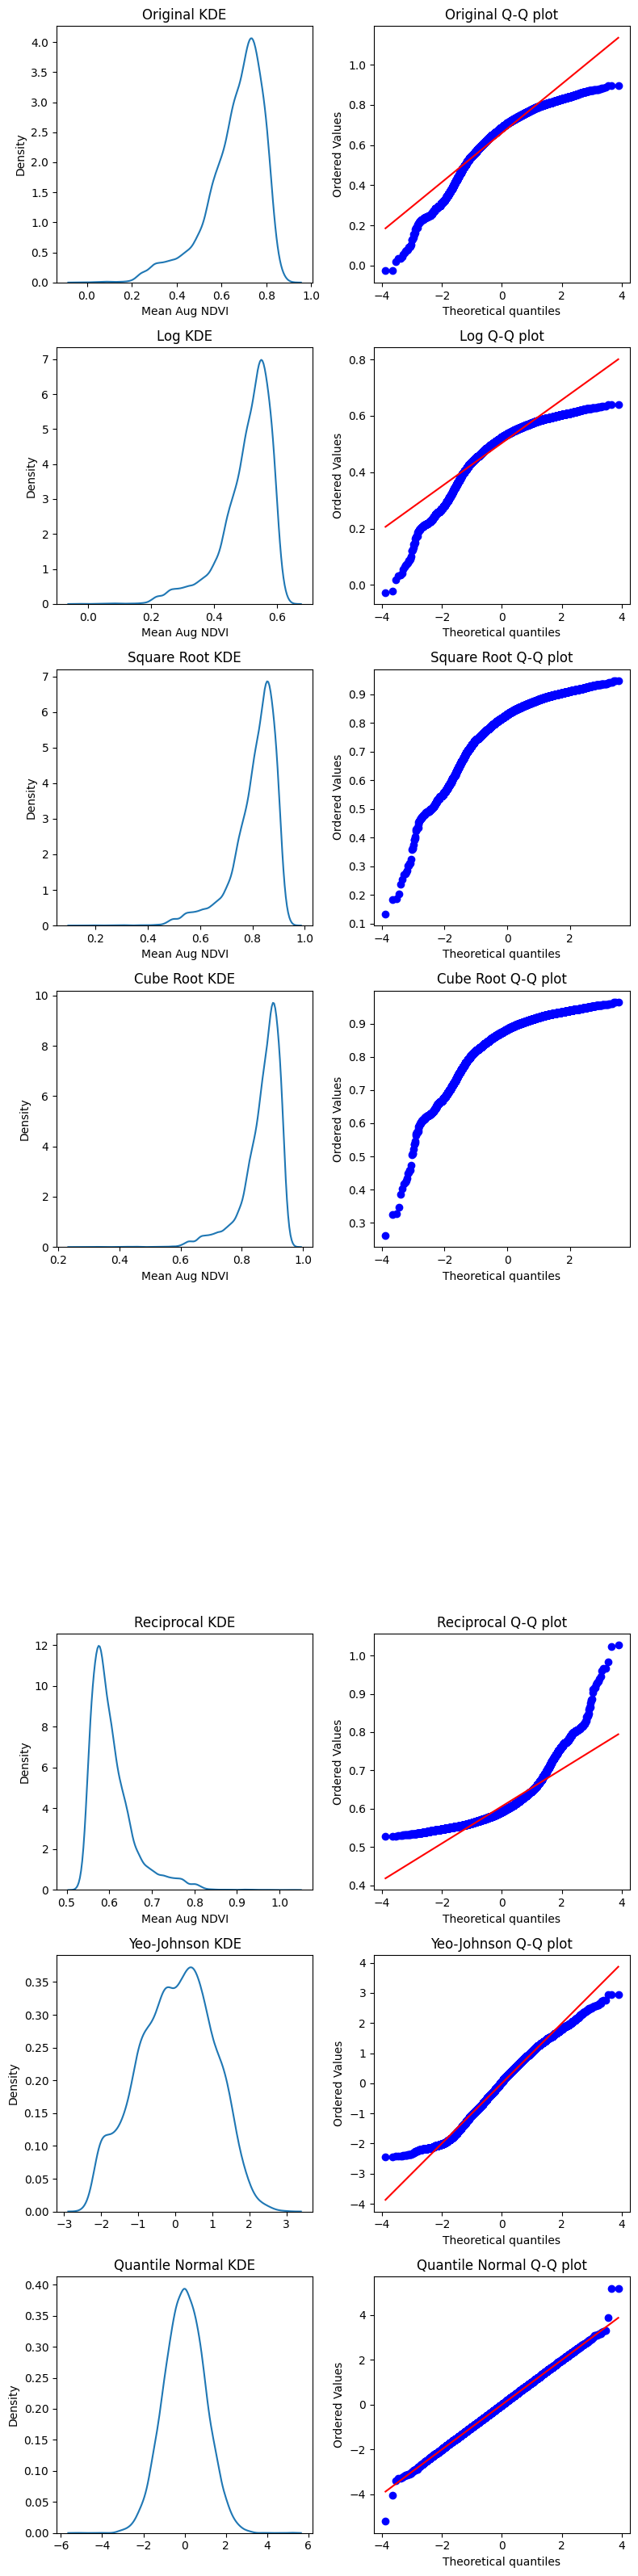

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.9152, p-value = 0.0000
  Anderson-Darling Test Statistic = 297.2005, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.8830, p-value = 0.0000
  Anderson-Darling Test Statistic = 406.0999, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = nan, p-value = nan
  Anderson-Darling Test Statistic = nan, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = nan, p-value = nan
  Anderson-Darling Test Statistic = nan, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.8434, p-value = 0.0000
  Anderson-Darling Test Statistic = 539.2572, Significance Level = [15.  10.   5.   2.5  1. ]

Yeo-Johnson Transformation:
  Shapiro-Wilk Test Statistic = 0.9903, p-value = 0.0000
  Anderson-Darling Test Statistic = 27.5420, Signif

In [193]:
# Normality NDVI
normality(reg_model_df, 'Mean Aug NDVI')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

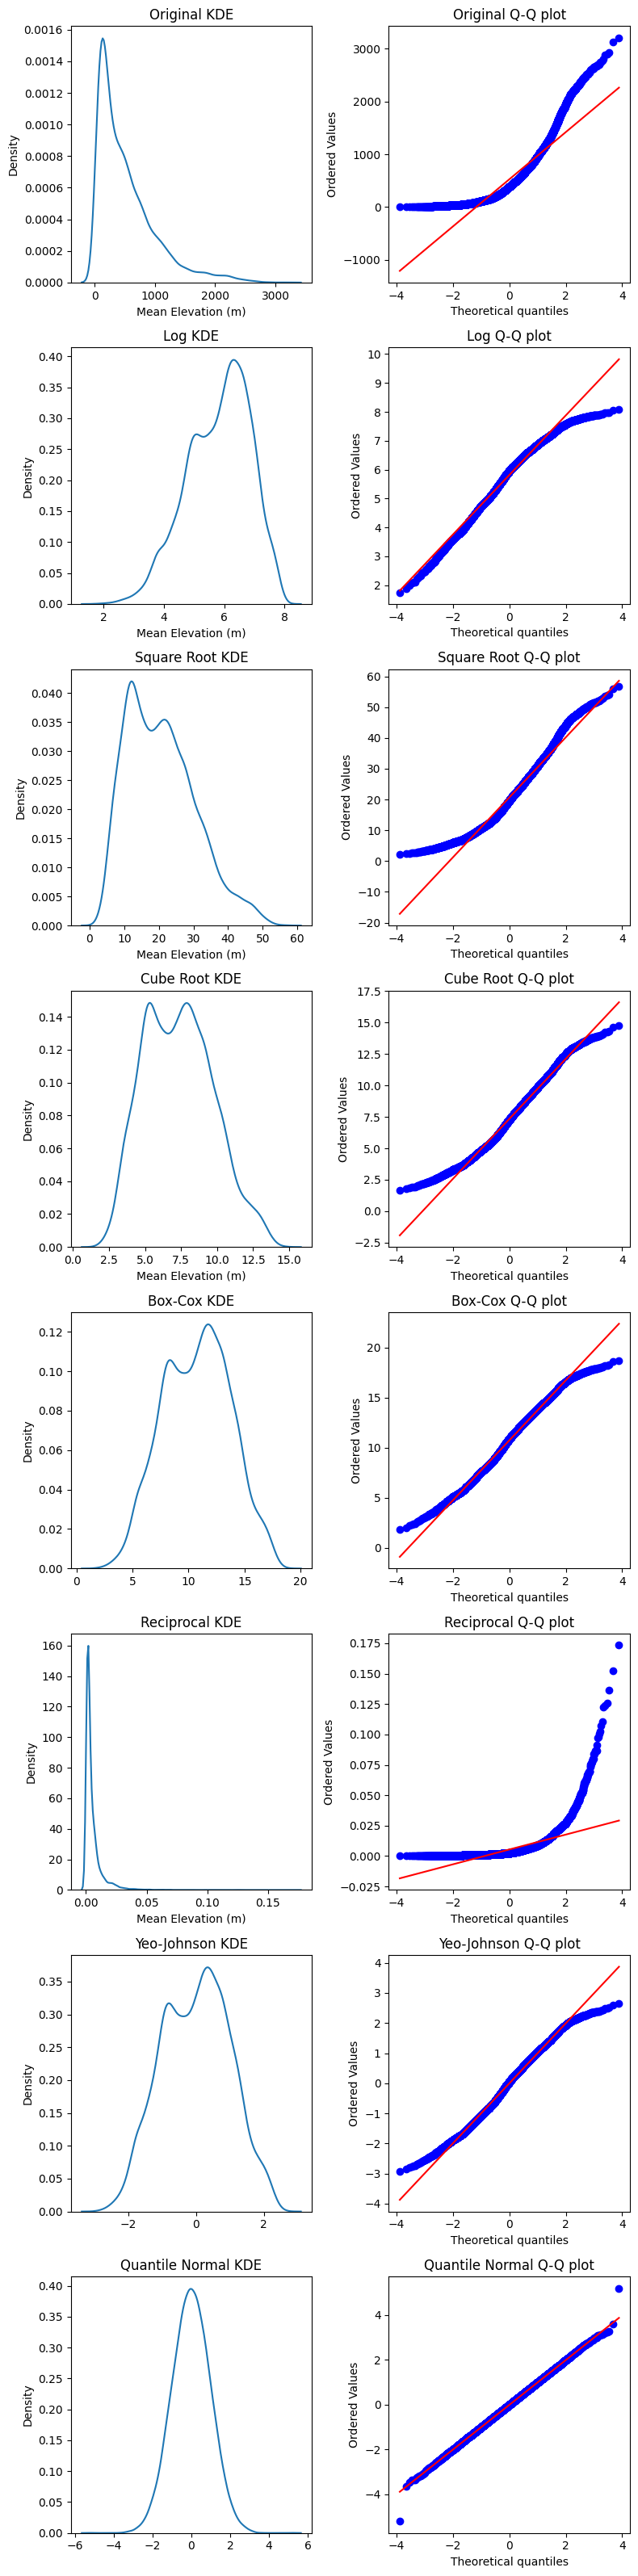

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.8443, p-value = 0.0000
  Anderson-Darling Test Statistic = 566.9690, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.9808, p-value = 0.0000
  Anderson-Darling Test Statistic = 70.9591, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = 0.9654, p-value = 0.0000
  Anderson-Darling Test Statistic = 110.2557, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = 0.9867, p-value = 0.0000
  Anderson-Darling Test Statistic = 41.3119, Significance Level = [15.  10.   5.   2.5  1. ]

Box-Cox Transformation:
  Shapiro-Wilk Test Statistic = 0.9929, p-value = 0.0000
  Anderson-Darling Test Statistic = 25.5748, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.5286, p-value = 0.0000
  Anderson-Darling Test Statistic = 

In [194]:
# Normality elev
normality(reg_model_df, 'Mean Elevation (m)')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

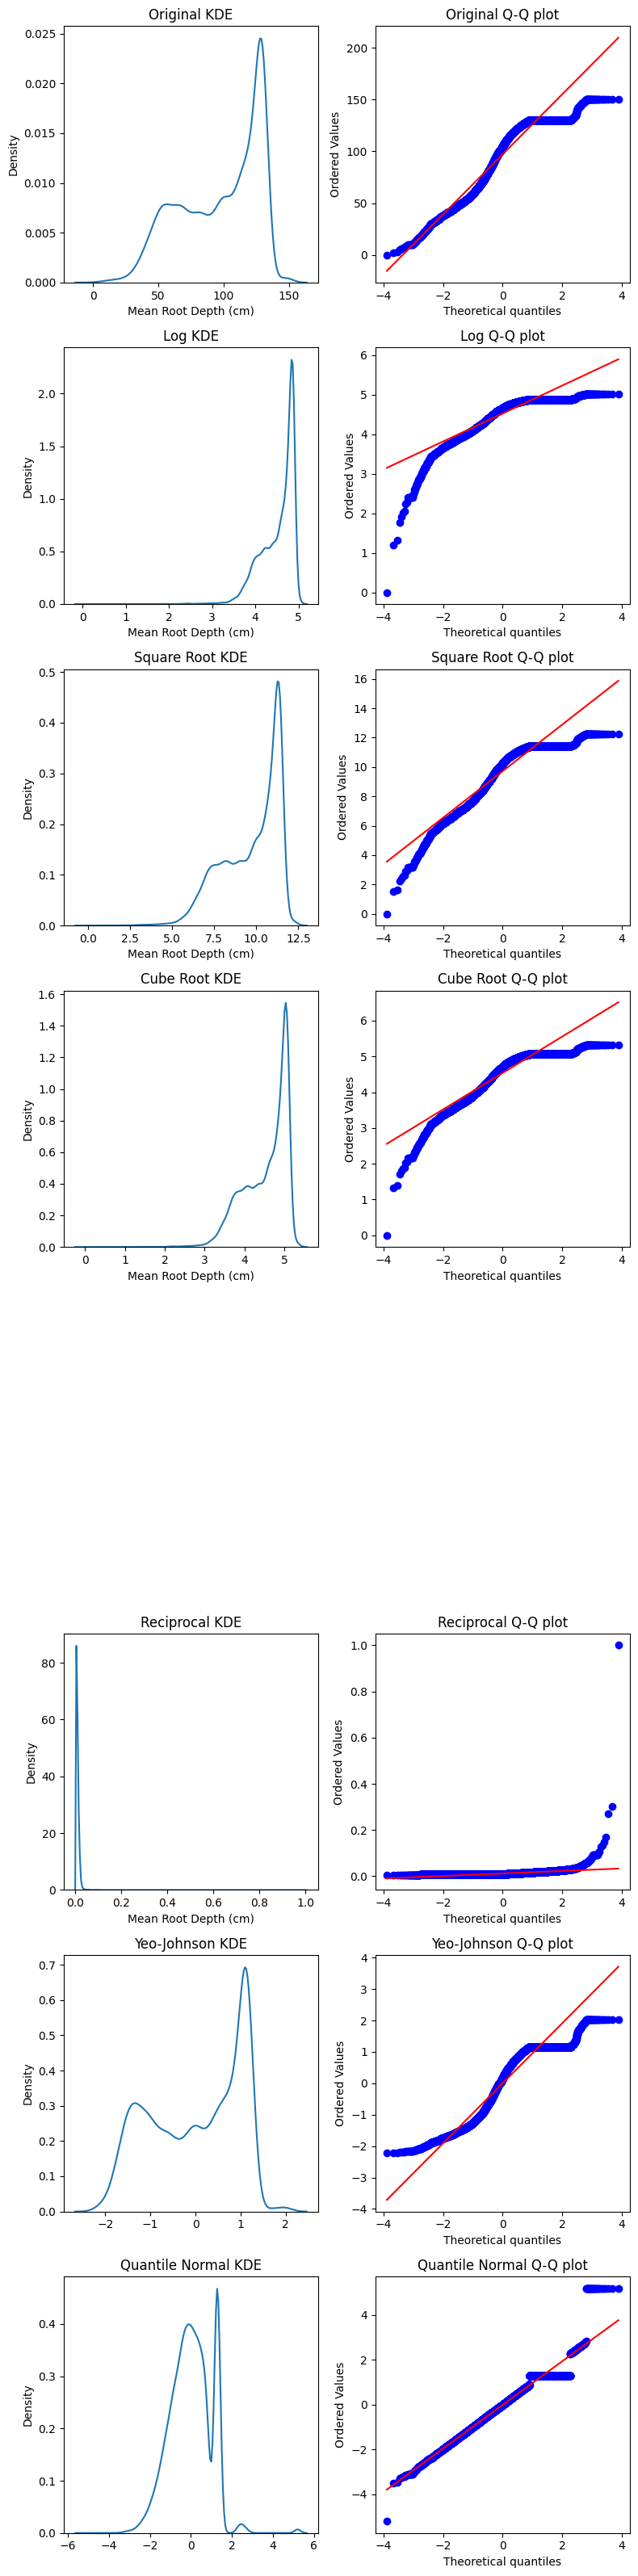

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.9069, p-value = 0.0000
  Anderson-Darling Test Statistic = 447.7063, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.8505, p-value = 0.0000
  Anderson-Darling Test Statistic = 594.8227, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = 0.8918, p-value = 0.0000
  Anderson-Darling Test Statistic = 503.1615, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = 0.8814, p-value = 0.0000
  Anderson-Darling Test Statistic = 529.0709, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.2371, p-value = 0.0000
  Anderson-Darling Test Statistic = 1928.7303, Significance Level = [15.  10.   5.   2.5  1. ]

Yeo-Johnson Transformation:
  Shapiro-Wilk Test Statistic = 0.9111, p-value = 0.0000
  Anderson-Darling Test Stat

In [195]:
# normality root depth
normality(reg_model_df, 'Mean Root Depth (cm)')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

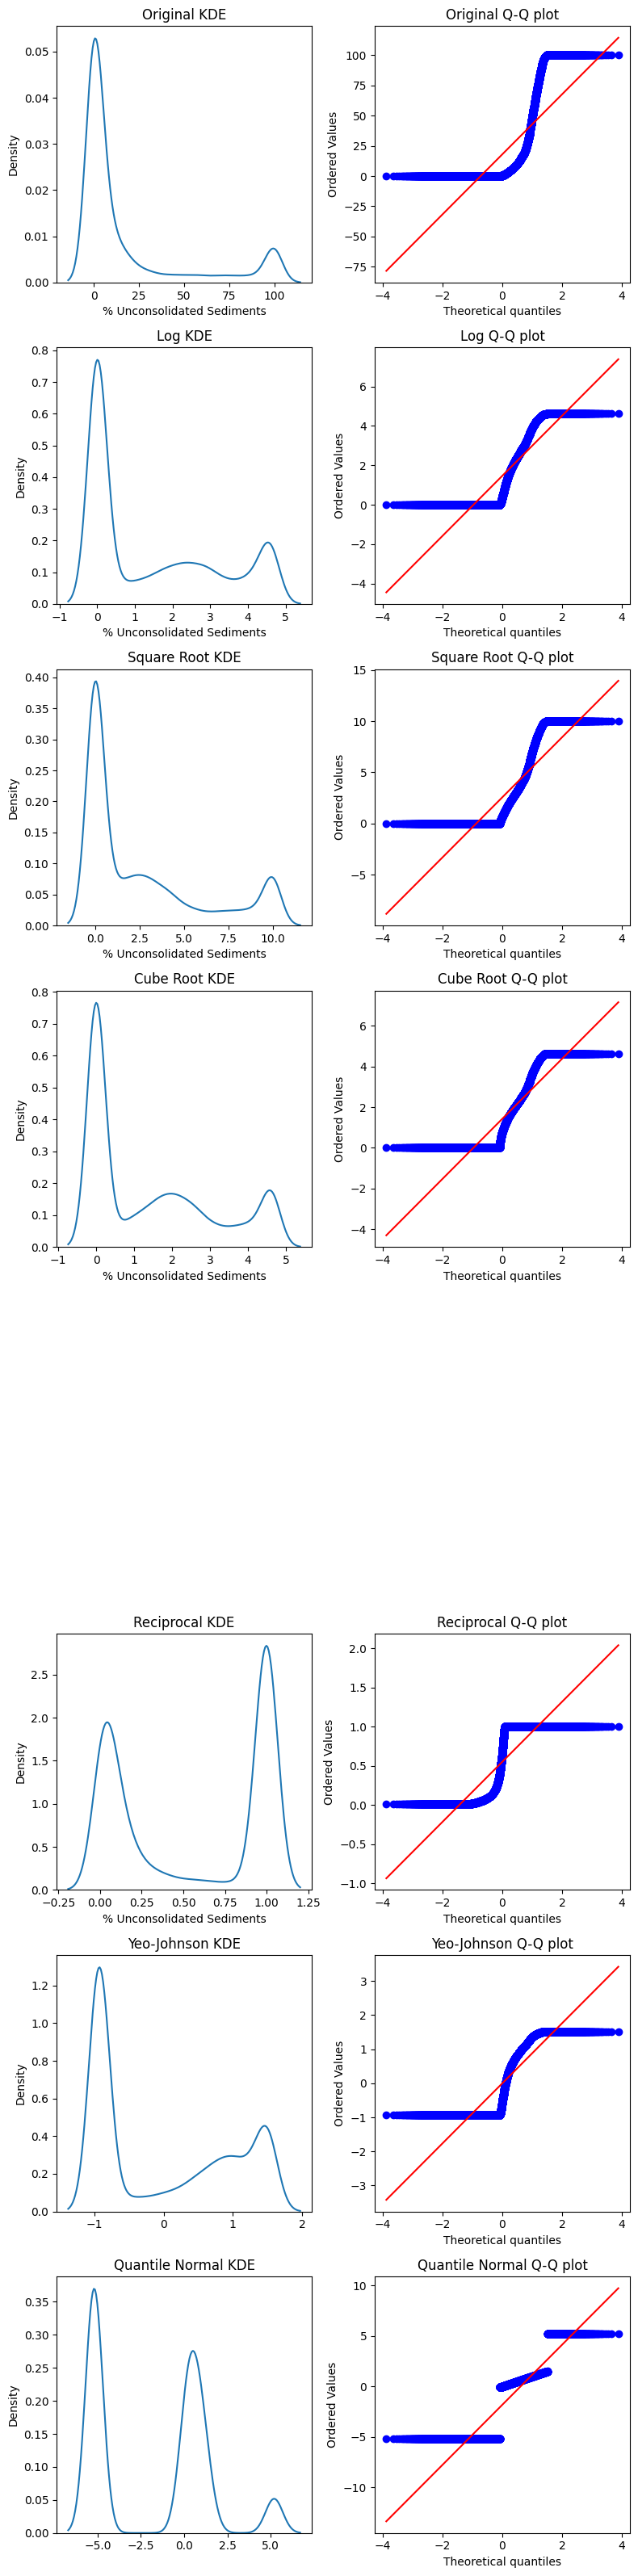

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.6076, p-value = 0.0000
  Anderson-Darling Test Statistic = 2322.2832, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.7842, p-value = 0.0000
  Anderson-Darling Test Statistic = 1176.5171, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = 0.7509, p-value = 0.0000
  Anderson-Darling Test Statistic = 1320.9588, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = 0.8007, p-value = 0.0000
  Anderson-Darling Test Statistic = 1030.9340, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.7231, p-value = 0.0000
  Anderson-Darling Test Statistic = 1673.1463, Significance Level = [15.  10.   5.   2.5  1. ]

Yeo-Johnson Transformation:
  Shapiro-Wilk Test Statistic = 0.7754, p-value = 0.0000
  Anderson-Darling Test 

In [196]:
# normality unconsolidated sediment
normality(reg_model_df, '% Unconsolidated Sediments')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13506.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

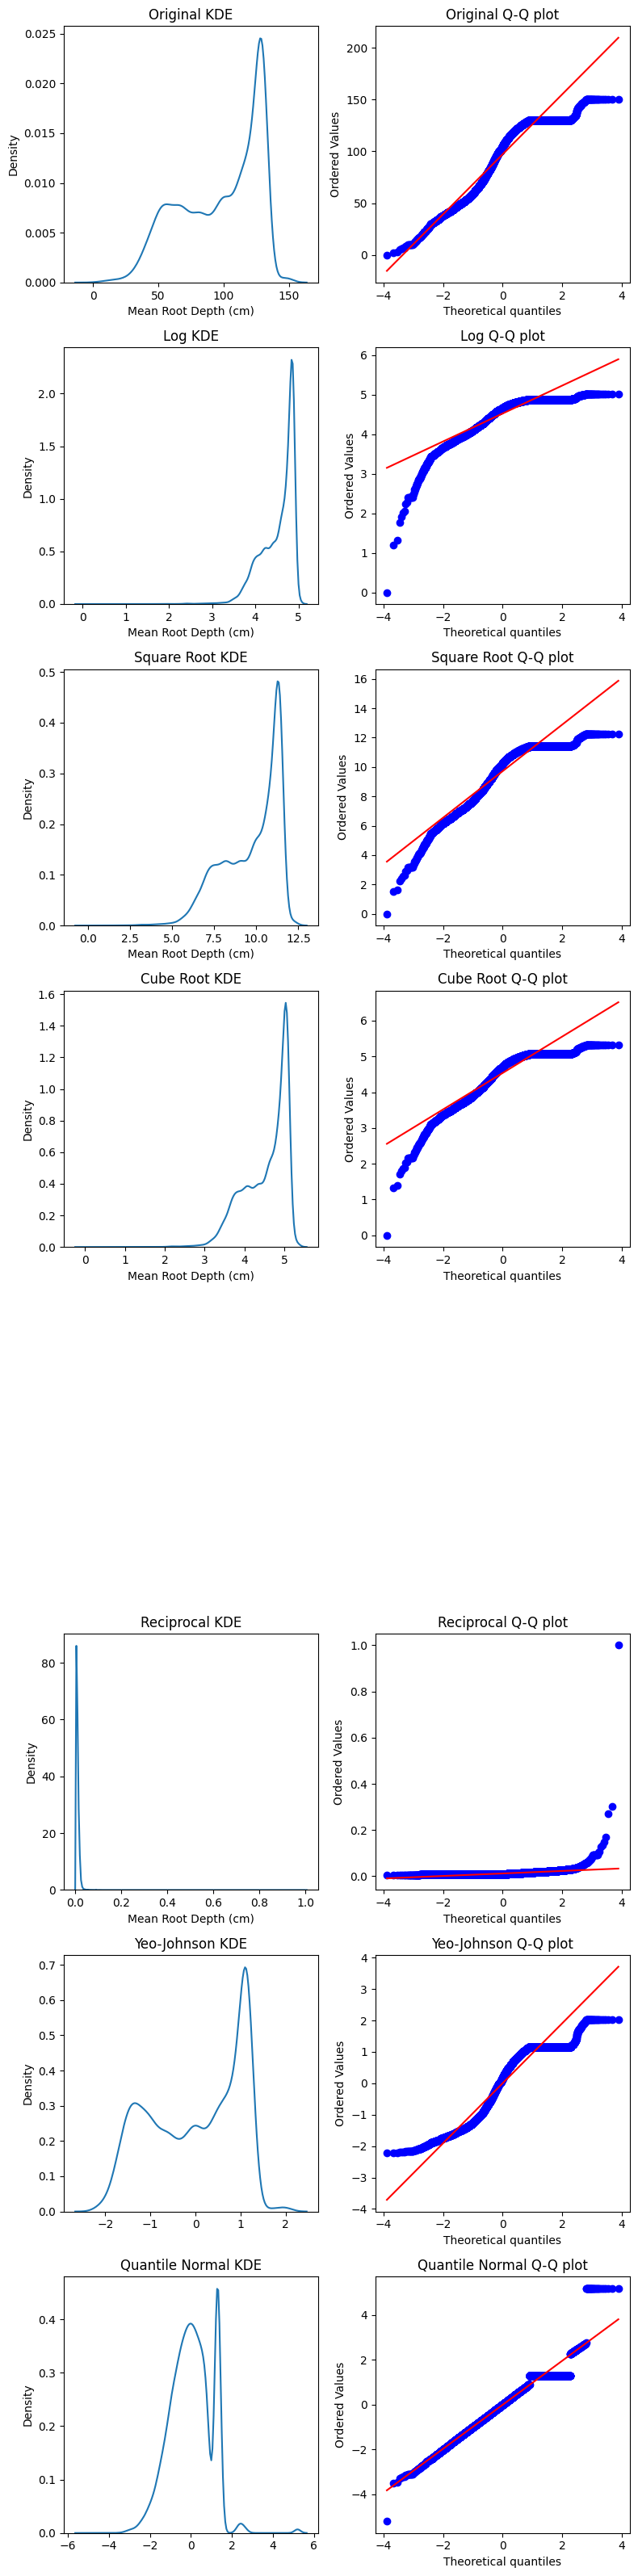

Original Transformation:
  Shapiro-Wilk Test Statistic = 0.9069, p-value = 0.0000
  Anderson-Darling Test Statistic = 447.7063, Significance Level = [15.  10.   5.   2.5  1. ]

Log Transformation:
  Shapiro-Wilk Test Statistic = 0.8505, p-value = 0.0000
  Anderson-Darling Test Statistic = 594.8227, Significance Level = [15.  10.   5.   2.5  1. ]

Square Root Transformation:
  Shapiro-Wilk Test Statistic = 0.8918, p-value = 0.0000
  Anderson-Darling Test Statistic = 503.1615, Significance Level = [15.  10.   5.   2.5  1. ]

Cube Root Transformation:
  Shapiro-Wilk Test Statistic = 0.8814, p-value = 0.0000
  Anderson-Darling Test Statistic = 529.0709, Significance Level = [15.  10.   5.   2.5  1. ]

Reciprocal Transformation:
  Shapiro-Wilk Test Statistic = 0.2371, p-value = 0.0000
  Anderson-Darling Test Statistic = 1928.7303, Significance Level = [15.  10.   5.   2.5  1. ]

Yeo-Johnson Transformation:
  Shapiro-Wilk Test Statistic = 0.9111, p-value = 0.0000
  Anderson-Darling Test Stat

In [197]:
# normality for OM
normality(reg_model_df, 'Mean Root Depth (cm)')

In [190]:
reg_model_df.columns

Index(['Basin ID', 'Mean Daily Streamflow (mm/day)',
       'Ratio of PET/Precipitation', 'Mean Terrain Slope (Degrees)',
       'Mean Aug NDVI', 'Mean Elevation (m)', 'Mean Root Depth (cm)',
       '% Unconsolidated Sediments', 'Mean % Soil Organic Material',
       'Days/Year with No Flow', 'Fraction of Snow on Days <0 C',
       'Max % Silt in Soil', '% Metamorphics',
       '90% Quantile Water Content (mm)', 'Stream Density (1000km/km2)',
       '25% Quantile % Sand in Soil', 'Mean % Clay in Soil',
       'Mean Soil Bulk Density (g/cm3)',
       'Lithological Dominant Class (Grouped)'],
      dtype='object')

In [192]:
# Define transformers
pt = PowerTransformer(method = 'yeo-johnson')
qt = QuantileTransformer(output_distribution = 'normal')

In [ ]:
# Create new transformed column for each feature required
reg_model_df['Ratio of PET/Precipitation (QT)'] = qt.fit_transform(reg_model_df['Ratio of PET/Precipitation'].values.reshape(-1,1))
reg_model_df['Mean Terrain Slope (Degrees) (QT)'] = qt.fit_transform(reg_model_df['Mean Terrain Slope (Degrees)'].values.reshape(-1,1))
reg_model_df['Mean Aug NDVI (QT)'] = qt.fit_transform(reg_model_df['Mean Aug NDVI'].values.reshape(-1,1))
reg_model_df['Mean Elevation (m) (QT)'] = qt.fit_transformat(reg_model_df['Mean Elevation (m)'].values.reshape(-1,1))
# No transformation for Mean Root Depth
# No transformation for % Unconsolidated Sediments
